<span style='color:red ; font-size:49px ; font-weght:bold ; font-family:"Arial "  '>
    UK Railway Project
</span>

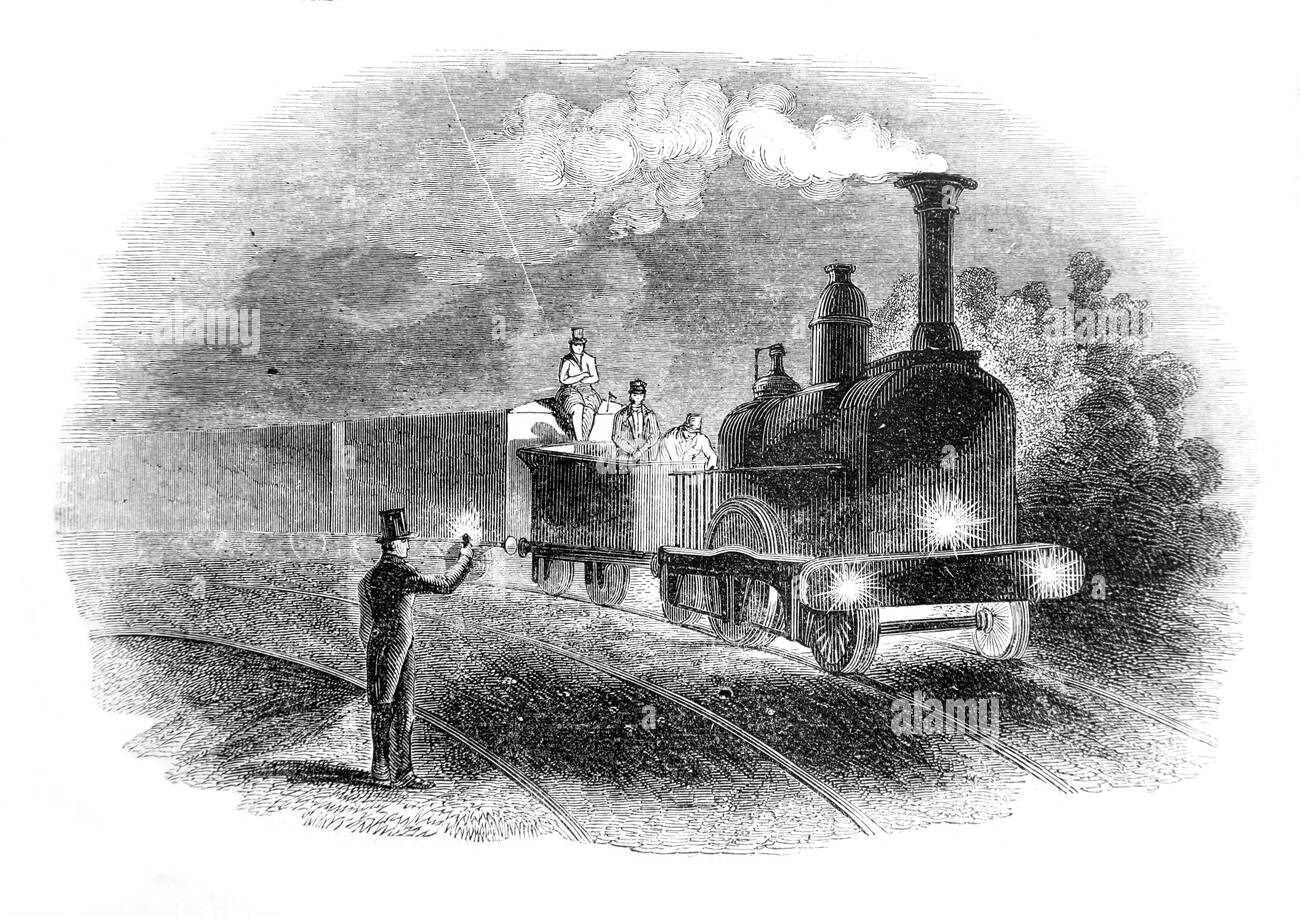

<span style='color:red ; font-size:40px ; font-weght:Bold ; font-family:"Arial "  '>
    1. Data Cleaning
</span> 

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Import libraries
</span>

In [1]:
import pandas as pd

import numpy as np

from datetime import datetime , timedelta ,timezone

from dateutil import tz

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Importing & Reading Data
</span>

In [2]:
df = pd.read_csv('railway.csv')
pd.set_option('display.max_columns',None)
df.head(7)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,NaN,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,NaN,No
6,1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,23:40:00,23:40:00,On Time,NaN,No


<span style='color:red ; font-size:40px ; font-weght:Bold ; font-family:"Arial "  '>
    1. Data Cleaning
</span> 

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Data Information
</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Duplicate Checking
</span>

In [4]:
df.duplicated().sum()

0

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Null Checking
</span>

In [5]:
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Data Checking
</span>

In [6]:
check_list = ['Purchase Type','Payment Method','Railcard'
              ,'Ticket Class','Ticket Type','Journey Status'
              ,'Reason for Delay','Refund Request']

def unique_value_check(df,col_name):
    '''Unique values check'''
    x = df[col_name].value_counts(dropna= False)
    print(x)

for col_name in check_list :
    print(col_name)
    unique_value_check(df,col_name)
    print('\n')


Purchase Type
Purchase Type
Online     18521
Station    13132
Name: count, dtype: int64


Payment Method
Payment Method
Credit Card    19136
Contactless    10834
Debit Card      1683
Name: count, dtype: int64


Railcard
Railcard
NaN         20918
Adult        4846
Disabled     3089
Senior       2800
Name: count, dtype: int64


Ticket Class
Ticket Class
Standard       28595
First Class     3058
Name: count, dtype: int64


Ticket Type
Ticket Type
Advance     17561
Off-Peak     8752
Anytime      5340
Name: count, dtype: int64


Journey Status
Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64


Reason for Delay
Reason for Delay
NaN                   27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64


Refund Request
Refund Request
No     305

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Working On Data Problems
</span>

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    "Railcard" Column
</span>

In [7]:
#df['Railcard'].replace('None','Not Used',inplace=True)
df['Railcard'].fillna('Not Used', inplace=True)
df['Railcard'].value_counts()

Railcard
Not Used    20918
Adult        4846
Disabled     3089
Senior       2800
Name: count, dtype: int64

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    "Reason for Delay" Column
</span>

In [8]:
update = {
    'Weather':'Weather Conditions',
    'Signal failure':'Signal Failure',
    'Staffing':'Staff Shortage'
}

df['Reason for Delay'] = df['Reason for Delay'].replace(update)

df['Reason for Delay'].fillna('There is no delay', inplace=True)

df['Reason for Delay'].value_counts(dropna= False)

Reason for Delay
There is no delay     27481
Weather Conditions     1372
Signal Failure          970
Staff Shortage          809
Technical Issue         707
Traffic                 314
Name: count, dtype: int64

<span style='color:green ; font-size:25px ; font-weght:bold ; font-family:"Arial "  '>
    Check
</span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Working With Dates & Time Part _01
</span>

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Taking A Look On Dates Columns
</span>

In [10]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Checking Type Of Dates Columns
</span>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Converting Date Columns to Datetime Type & Combine Some Columns
</span>

In [12]:
df['Purchase Datetime'] = pd.to_datetime(df['Date of Purchase']+' '+df['Time of Purchase'])
df['Departure Datetime'] = pd.to_datetime(df['Date of Journey']+' '+df['Departure Time'])
df['Arrival Datetime'] = pd.to_datetime(df['Date of Journey']+' '+df['Arrival Time'])
df['Actual Arrival Datetime'] = pd.to_datetime(df['Date of Journey']+' '+df['Actual Arrival Time'])

df = df.rename(columns={'Date of Journey':'Journey Date'})
df['Journey Date'] = pd.to_datetime(df['Journey Date'])

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Extract Some Time Columns
</span>

In [13]:
df['Journey Duration'] = df['Actual Arrival Datetime'] - df['Departure Datetime']
df['Delay Duration'] = df['Actual Arrival Datetime'] - df['Arrival Datetime']

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Taking A Look On Data
</span>

In [14]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,0 days 02:30:00,0 days 00:00:00
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,0 days 01:55:00,0 days 00:05:00
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,0 days 00:30:00,0 days 00:00:00
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,0 days 01:00:00,0 days 00:00:00
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,0 days 02:15:00,0 days 00:00:00


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Checking Type Of Dates Columns After Converting
</span>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Transaction ID           31653 non-null  object         
 1   Date of Purchase         31653 non-null  object         
 2   Time of Purchase         31653 non-null  object         
 3   Purchase Type            31653 non-null  object         
 4   Payment Method           31653 non-null  object         
 5   Railcard                 31653 non-null  object         
 6   Ticket Class             31653 non-null  object         
 7   Ticket Type              31653 non-null  object         
 8   Price                    31653 non-null  int64          
 9   Departure Station        31653 non-null  object         
 10  Arrival Destination      31653 non-null  object         
 11  Journey Date             31653 non-null  datetime64[ns] 
 12  Departure Time    

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Describe Time Columns
</span>

In [16]:
df[['Journey Duration','Delay Duration']].describe()

,Journey Duration,Delay Duration
count,29773,29773
mean,0 days 00:30:04.913176367,0 days 00:03:14.981358949
std,0 days 04:10:08.439320251,0 days 00:14:46.232314799
min,-1 days +00:25:00,0 days 00:00:00
25%,0 days 00:30:00,0 days 00:00:00
50%,0 days 01:20:00,0 days 00:00:00
75%,0 days 01:30:00,0 days 00:00:00
max,0 days 04:48:00,0 days 03:00:00


- We Found Out The Minimum Journey Duration Is Negative !!! What's The Problem Here ? 

In [17]:
df['Journey Duration'].dt.total_seconds().head()

0    9000.0
1    6900.0
2    1800.0
3    3600.0
4    8100.0
Name: Journey Duration, dtype: float64

In [18]:
df['Journey Duration'].dt.total_seconds().min()

-84900.0

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Let's Take A Look On Mid Night Trips
</span>

In [19]:
# pd.set_option('display.max_rows', None)
start_time = '2024-3-31 23:00:00'
end_time = '2024-4-1 1:00:00'
y = df[(df['Departure Datetime']>=start_time)&(df['Departure Datetime']<=end_time)]
y=y.sort_values(['Departure Datetime'], ascending=False)
y.head(5)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration
23904,f8d89b4e-8363-4d11-9195,2024-03-31,22:37:25,Online,Contactless,Adult,Standard,Advance,2,Manchester Piccadilly,Liverpool Lime Street,2024-04-01,00:00:00,00:30:00,00:30:00,On Time,There is no delay,No,2024-03-31 22:37:25,2024-04-01 00:00:00,2024-04-01 00:30:00,2024-04-01 00:30:00,0 days 00:30:00,0 days
23635,58691264-8133-43ce-a79d,2024-03-31,01:25:42,Online,Contactless,Disabled,Standard,Off-Peak,8,York,Durham,2024-03-31,23:45:00,00:35:00,00:35:00,On Time,There is no delay,No,2024-03-31 01:25:42,2024-03-31 23:45:00,2024-03-31 00:35:00,2024-03-31 00:35:00,-1 days +00:50:00,0 days
23631,838998e5-4762-48ba-80c9,2024-03-31,01:04:19,Online,Credit Card,Not Used,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-03-31,23:30:00,01:45:00,01:45:00,On Time,There is no delay,No,2024-03-31 01:04:19,2024-03-31 23:30:00,2024-03-31 01:45:00,2024-03-31 01:45:00,-1 days +02:15:00,0 days
23632,c7ecdf2f-b7ab-4fab-9e1d,2024-03-31,01:07:10,Station,Contactless,Not Used,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-03-31,23:30:00,00:50:00,00:50:00,On Time,There is no delay,No,2024-03-31 01:07:10,2024-03-31 23:30:00,2024-03-31 00:50:00,2024-03-31 00:50:00,-1 days +01:20:00,0 days
23633,5b79708b-b7b4-4e04-9cb4,2024-03-31,01:07:57,Station,Credit Card,Not Used,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-03-31,23:30:00,00:50:00,00:50:00,On Time,There is no delay,No,2024-03-31 01:07:57,2024-03-31 23:30:00,2024-03-31 00:50:00,2024-03-31 00:50:00,-1 days +01:20:00,0 days


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    We Will Solve This Problem By Adding A Day For Any Trip Has Been Arrived After Mid Night
</span>

In [20]:
df["Arrival Datetime"] = df.apply(
    lambda row: row["Arrival Datetime"] + pd.Timedelta(days=1) if row["Arrival Datetime"] < row["Departure Datetime"] else row["Arrival Datetime"],
    axis=1
)


df["Actual Arrival Datetime"] = df.apply(
    lambda row: row["Actual Arrival Datetime"] + pd.Timedelta(days=1) if row["Actual Arrival Datetime"] < row["Departure Datetime"] else row["Actual Arrival Datetime"],
    axis=1
)

# df["Arrival Datetime"] = df["Arrival Datetime"].apply(lambda x: x + timedelta(days=1) if x < df["Departure Datetime"] else x)
# df["Actual Arrival Datetime"] = df["Actual Arrival Datetime"].apply(lambda x: x + timedelta(days=1) if x < df["Departure Datetime"] else x)



# df["Journey Duration"] = df["Journey Duration"].apply(lambda x: x + pd.Timedelta(days=1) if x.total_seconds() < 0 else x)
# df["Delay Duration"] = df["Delay Duration"].apply(lambda x: x + pd.Timedelta(days=1) if x.total_seconds() < 0 else x)



<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Updating "Journey Duration"&"Delay Duration" Columns
</span>

In [21]:
# df.loc[df["Arrival Datetime"] < df["Departure Datetime"], "Arrival Datetime"] += timedelta(days=1)
# df.loc[df["Actual Arrival Datetime"] < df["Departure Datetime"], "Actual Arrival Datetime"] += timedelta(days=1)


df['Journey Duration'] = df['Actual Arrival Datetime'] - df['Departure Datetime']
df['Delay Duration'] = df['Actual Arrival Datetime'] - df['Arrival Datetime']

In [22]:
# for i in range(len(df)):
  
#     Departure = df.loc[i, 'Departure Datetime']
#     Arrival = df.loc[i, 'Arrival Datetime']
#     Actual = df.loc[i, 'Actual Arrival Datetime']

    
#     if (Arrival < Departure) or (Actual < Departure):
        
#         Arrival += timedelta(days=1)
#         Actual += timedelta(days=1)

In [23]:
# for i in range(len(df)):
#     dep = df.loc[i, "Departure Datetime"]
#     arr = df.loc[i, "Arrival Datetime"]
    
#     print(f"Before Fix: Row {i} - Departure: {dep}, Arrival: {arr}")

#     if arr < dep:
#         df.loc[i, "Arrival Datetime"] += timedelta(days=1)
    
#     print(f"After Fix: Row {i} - Departure: {dep}, Arrival: {df.loc[i, 'Arrival Datetime']}\n")


In [24]:
# df["Journey Duration"] = df["Arrival Datetime"] - df["Departure Datetime"]
# print(df[["Departure Datetime", "Arrival Datetime", "Journey Duration"]].head(35))


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Let's Check Again
</span>

In [25]:
start_time = '2024-3-31 23:00:00'
end_time = '2024-4-1 1:00:00'
y = df[(df['Departure Datetime']>=start_time)&(df['Departure Datetime']<=end_time)]
y=y.sort_values(['Departure Datetime'], ascending=False)
y.head(5)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration
23904,f8d89b4e-8363-4d11-9195,2024-03-31,22:37:25,Online,Contactless,Adult,Standard,Advance,2,Manchester Piccadilly,Liverpool Lime Street,2024-04-01,00:00:00,00:30:00,00:30:00,On Time,There is no delay,No,2024-03-31 22:37:25,2024-04-01 00:00:00,2024-04-01 00:30:00,2024-04-01 00:30:00,0 days 00:30:00,0 days
23635,58691264-8133-43ce-a79d,2024-03-31,01:25:42,Online,Contactless,Disabled,Standard,Off-Peak,8,York,Durham,2024-03-31,23:45:00,00:35:00,00:35:00,On Time,There is no delay,No,2024-03-31 01:25:42,2024-03-31 23:45:00,2024-04-01 00:35:00,2024-04-01 00:35:00,0 days 00:50:00,0 days
23631,838998e5-4762-48ba-80c9,2024-03-31,01:04:19,Online,Credit Card,Not Used,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-03-31,23:30:00,01:45:00,01:45:00,On Time,There is no delay,No,2024-03-31 01:04:19,2024-03-31 23:30:00,2024-04-01 01:45:00,2024-04-01 01:45:00,0 days 02:15:00,0 days
23632,c7ecdf2f-b7ab-4fab-9e1d,2024-03-31,01:07:10,Station,Contactless,Not Used,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-03-31,23:30:00,00:50:00,00:50:00,On Time,There is no delay,No,2024-03-31 01:07:10,2024-03-31 23:30:00,2024-04-01 00:50:00,2024-04-01 00:50:00,0 days 01:20:00,0 days
23633,5b79708b-b7b4-4e04-9cb4,2024-03-31,01:07:57,Station,Credit Card,Not Used,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-03-31,23:30:00,00:50:00,00:50:00,On Time,There is no delay,No,2024-03-31 01:07:57,2024-03-31 23:30:00,2024-04-01 00:50:00,2024-04-01 00:50:00,0 days 01:20:00,0 days


In [26]:
df[['Journey Duration','Delay Duration']].describe()

,Journey Duration,Delay Duration
count,29773,29773
mean,0 days 01:14:23.106841769,0 days 00:03:14.981358949
std,0 days 00:40:13.390503460,0 days 00:14:46.232314799
min,0 days 00:15:00,0 days 00:00:00
25%,0 days 00:30:00,0 days 00:00:00
50%,0 days 01:20:00,0 days 00:00:00
75%,0 days 01:30:00,0 days 00:00:00
max,0 days 04:48:00,0 days 03:00:00


In [27]:
df['Journey Duration'].dt.total_seconds().head()

0    9000.0
1    6900.0
2    1800.0
3    3600.0
4    8100.0
Name: Journey Duration, dtype: float64

In [28]:
df['Journey Duration'].dt.total_seconds().min()

900.0

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Working With Dates & Time Part _02
</span>

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    We Know That This Dataset It's Just For UK So We Will Put Our DateTime Columns In UK Time Zone, Why?
</span><br>


<span style='color:red ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    To avoid any problem when applying "Daylight Saving Time" and "Ending Daylight Saving Time" in the country
</span>


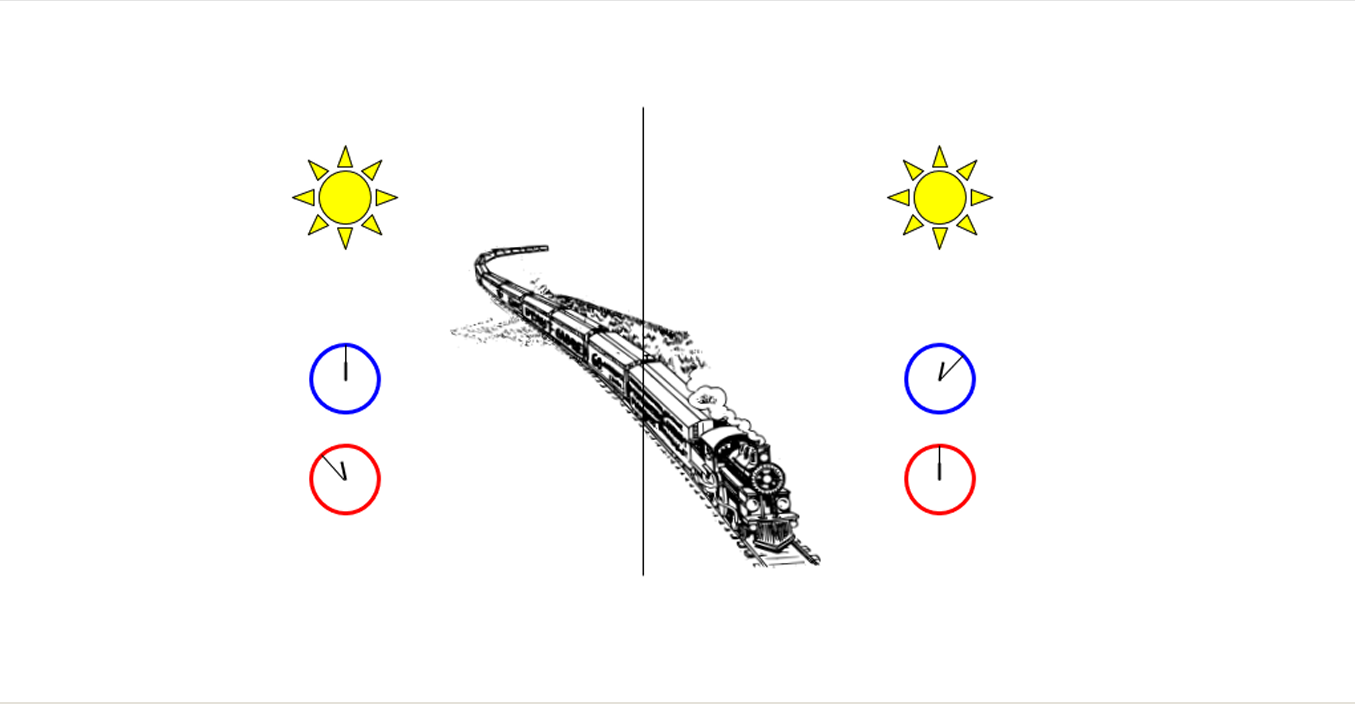

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Example For Daylight Saving Time
</span>

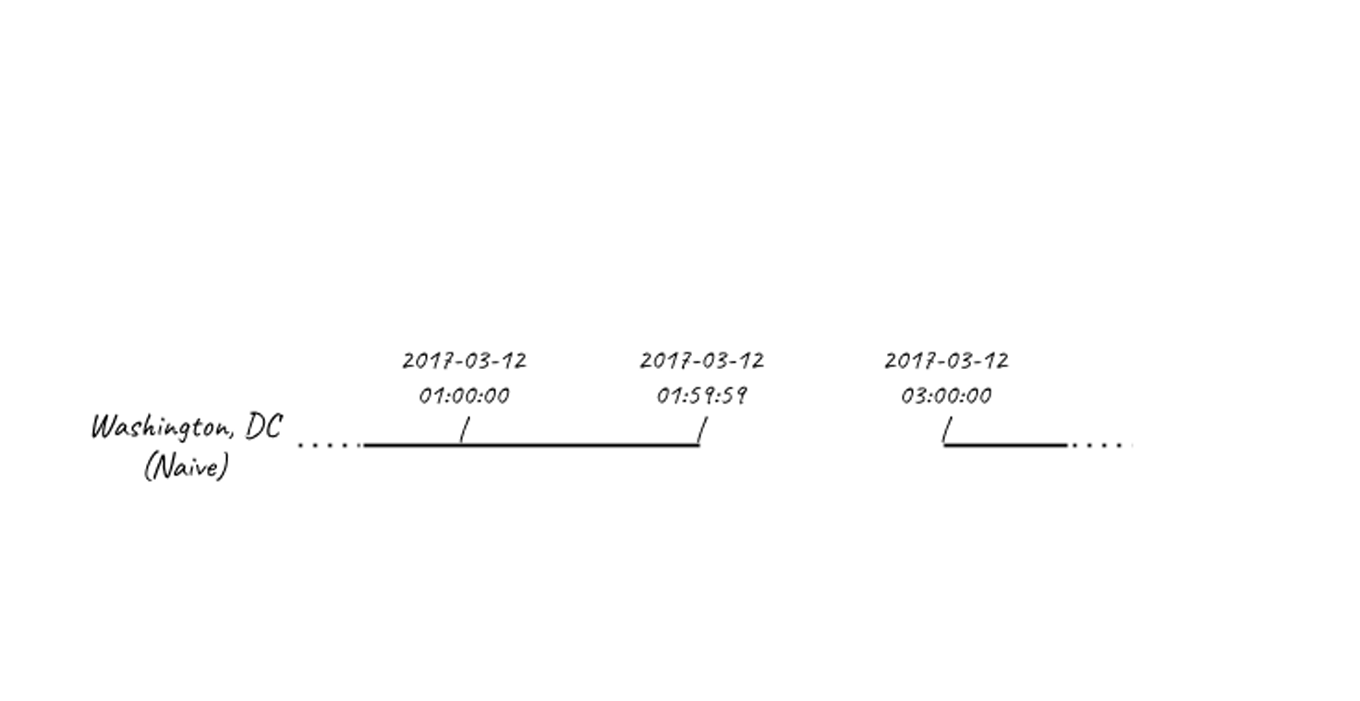

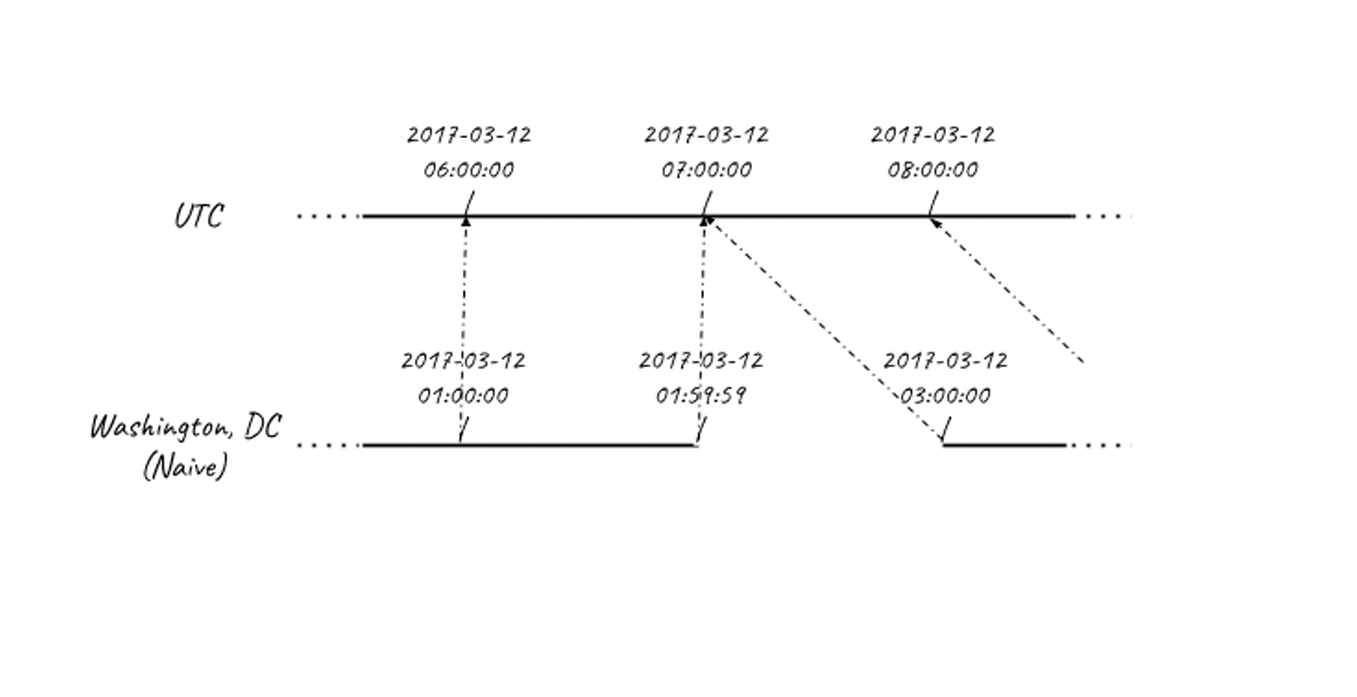

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Example For Ending Daylight Saving Time
</span>

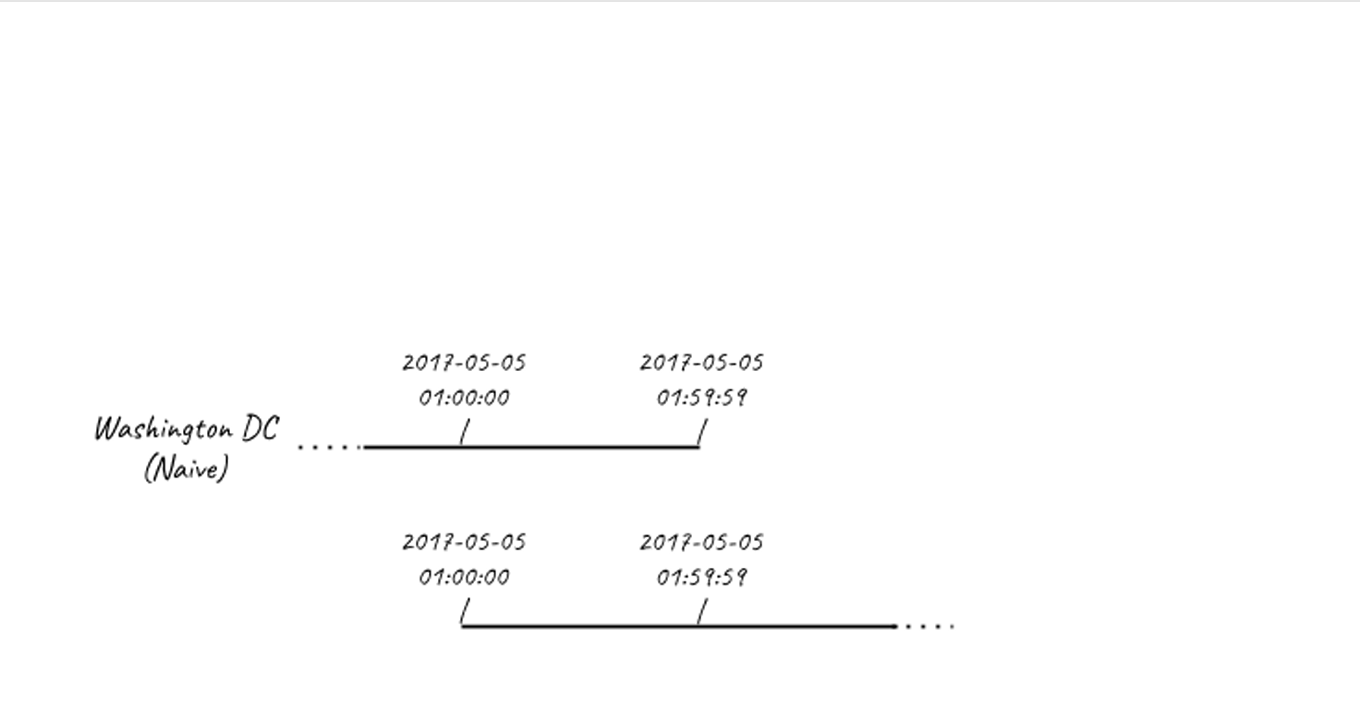

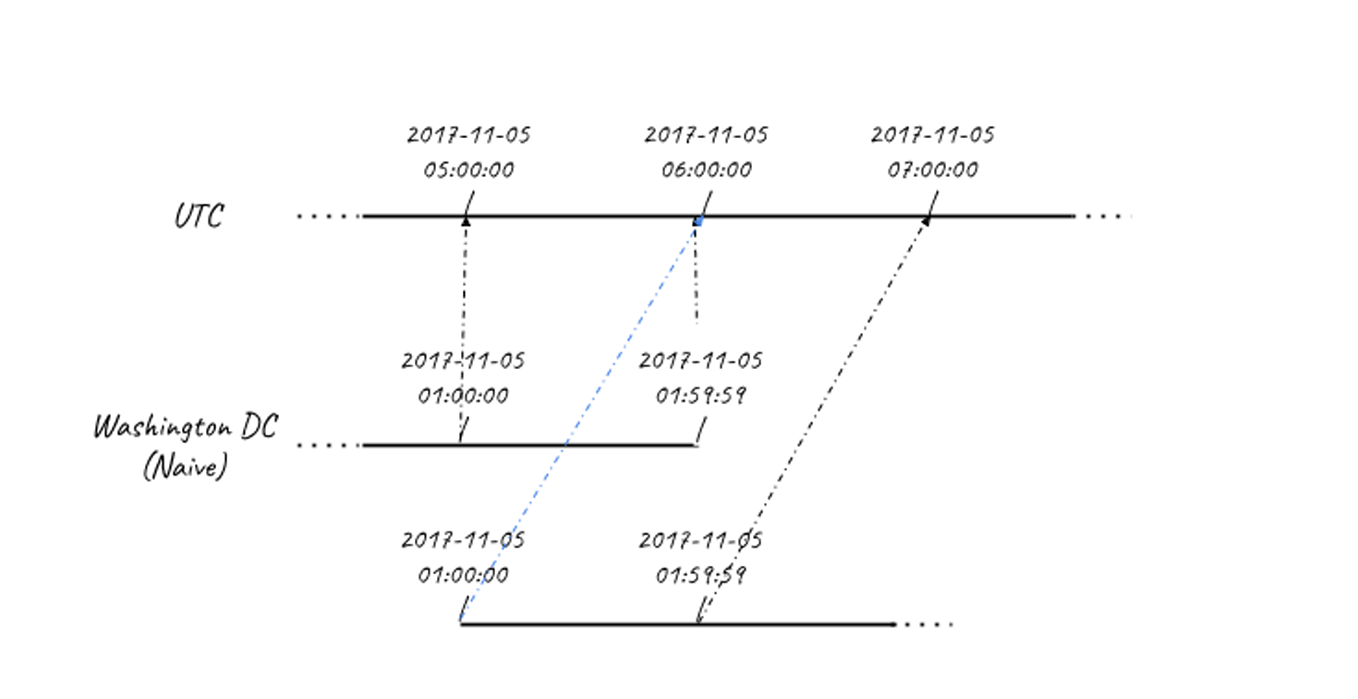

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    How Can We Do That ? By 3 Steps
</span><br>

<br>
<span style='color:red ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    First, By Importing <mark>"tz"</mark> From <mark>"dateutil"</mark> Liberary
</span>


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Imports the <mark>"tz"</mark> module from the <mark>"dateutil" </mark>library, which is used for handling time zones in Python. It allows us to get local time zones, convert between time zones, and create timezone-aware datetime objects easily.
</span>

<span style='color:red ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Second, By Convert Our DateTime Columns To <mark>UTC</mark> "Coordinated Univresal Time"
</span>

<span style='color:red ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Then, By Convert Our DateTime Columns Again To Any Time Zone We Want , In this Data We Will Convert To <mark>Europe/London</mark> Time Zone
</span>

In [29]:
from dateutil import tz

def convert_columns_to_uk_timezone(df, columns, original_timezone='UTC'):

    uk_timezone = tz.gettz('Europe/London')

    for col in columns:
        
        if df[col].dt.tz is None:
            df[col] = df[col].dt.tz_localize(original_timezone)

        
        df[col] = df[col].dt.tz_convert(uk_timezone)

    return df

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Now We Going To Apply The Previous Function On Our DateTime Columns
</span>

In [30]:
date_cols=['Purchase Datetime','Departure Datetime'
           ,'Arrival Datetime','Actual Arrival Datetime']

convert_columns_to_uk_timezone(df,date_cols)


,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11+00:00,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01+00:00,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27+00:00,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36+00:00,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56+00:00,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,Not Used,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,There is no delay,No,2024-04-30 19:42:58+01:00,2024-04-30 21:00:00+01:00,2024-04-30 21:30:00+01:00,2024-04-30 21:30:00+01:00,0 days 00:30:00,0 days 00:00:00
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,Not Used,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,There is no delay,No,2024-04-30 19:46:10+01:00,2024-04-30 21:15:00+01:00,2024-04-30 22:35:00+01:00,2024-04-30 22:35:00+01:00,0 days 01:20:00,0 days 00:00:00
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,Not Used,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,There is no delay,No,2024-04-30 19:56:41+01:00,2024-04-30 21:15:00+01:00,2024-04-30 21:45:00+01:00,2024-04-30 21:45:00+01:00,0 days 00:30:00,0 days 00:00:00
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,Not Used,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,There is no delay,No,2024-04-30 20:51:47+01:00,2024-04-30 22:15:00+01:00,2024-04-30 23:35:00+01:00,2024-04-30 23:35:00+01:00,0 days 01:20:00,0 days 00:00:00


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Checking Date Range
</span>

In [31]:
df[['Purchase Datetime','Journey Date']].agg([min,max])

,Purchase Datetime,Journey Date
min,2023-12-08 12:41:11+00:00,2024-01-01
max,2024-04-30 21:05:39+01:00,2024-04-30


In [32]:
df.isna().sum()

Transaction ID                0
Date of Purchase              0
Time of Purchase              0
Purchase Type                 0
Payment Method                0
Railcard                      0
Ticket Class                  0
Ticket Type                   0
Price                         0
Departure Station             0
Arrival Destination           0
Journey Date                  0
Departure Time                0
Arrival Time                  0
Actual Arrival Time        1880
Journey Status                0
Reason for Delay              0
Refund Request                0
Purchase Datetime             0
Departure Datetime            0
Arrival Datetime              0
Actual Arrival Datetime    1880
Journey Duration           1880
Delay Duration             1880
dtype: int64

In [33]:
df[df['Journey Status']=='Cancelled'].head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit Card,Not Used,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,No,2024-01-01 03:52:29+00:00,2024-01-02 02:15:00+00:00,2024-01-02 03:35:00+00:00,NaT,NaT,NaT
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02,16:00:00,17:20:00,NaN,Cancelled,Technical Issue,No,2024-01-01 17:43:02+00:00,2024-01-02 16:00:00+00:00,2024-01-02 17:20:00+00:00,NaT,NaT,NaT
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit Card,Not Used,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,Yes,2024-01-02 00:54:33+00:00,2024-01-02 02:15:00+00:00,2024-01-02 03:35:00+00:00,NaT,NaT,NaT
111,d618c56f-3512-484d-9876,2024-01-02,03:33:32,Station,Credit Card,Not Used,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-02,05:00:00,06:20:00,NaN,Cancelled,Staff Shortage,Yes,2024-01-02 03:33:32+00:00,2024-01-02 05:00:00+00:00,2024-01-02 06:20:00+00:00,NaT,NaT,NaT
148,eace2ada-5294-47e6-b4b8,2024-01-02,06:33:00,Station,Credit Card,Not Used,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02,08:00:00,10:15:00,NaN,Cancelled,Staff Shortage,No,2024-01-02 06:33:00+00:00,2024-01-02 08:00:00+00:00,2024-01-02 10:15:00+00:00,NaT,NaT,NaT


In [34]:
cancelled_mask = df['Journey Status'] == 'Cancelled'

df.loc[cancelled_mask & df['Actual Arrival Datetime'].isna(), 'Actual Arrival Datetime'] = df.loc[cancelled_mask & df['Actual Arrival Datetime'].isna(), 'Departure Datetime']

zero_time = pd.to_timedelta(0)

df.loc[cancelled_mask & df['Journey Duration'].isna(), 'Journey Duration'] = zero_time
df.loc[cancelled_mask & df['Delay Duration'].isna(), 'Delay Duration'] = zero_time

In [35]:
df[df['Journey Status']=='Cancelled'].head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration
39,69eaff73-ca3a-4831-905b,2024-01-01,03:52:29,Online,Credit Card,Not Used,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,No,2024-01-01 03:52:29+00:00,2024-01-02 02:15:00+00:00,2024-01-02 03:35:00+00:00,2024-01-02 02:15:00+00:00,0 days,0 days
75,a88f097f-bda3-4394-9c7d,2024-01-01,17:43:02,Station,Debit Card,Disabled,First Class,Advance,35,London Euston,Birmingham New Street,2024-01-02,16:00:00,17:20:00,NaN,Cancelled,Technical Issue,No,2024-01-01 17:43:02+00:00,2024-01-02 16:00:00+00:00,2024-01-02 17:20:00+00:00,2024-01-02 16:00:00+00:00,0 days,0 days
91,8a66ead7-e381-4311-b667,2024-01-02,00:54:33,Online,Credit Card,Not Used,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-02,02:15:00,03:35:00,NaN,Cancelled,Technical Issue,Yes,2024-01-02 00:54:33+00:00,2024-01-02 02:15:00+00:00,2024-01-02 03:35:00+00:00,2024-01-02 02:15:00+00:00,0 days,0 days
111,d618c56f-3512-484d-9876,2024-01-02,03:33:32,Station,Credit Card,Not Used,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-02,05:00:00,06:20:00,NaN,Cancelled,Staff Shortage,Yes,2024-01-02 03:33:32+00:00,2024-01-02 05:00:00+00:00,2024-01-02 06:20:00+00:00,2024-01-02 05:00:00+00:00,0 days,0 days
148,eace2ada-5294-47e6-b4b8,2024-01-02,06:33:00,Station,Credit Card,Not Used,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02,08:00:00,10:15:00,NaN,Cancelled,Staff Shortage,No,2024-01-02 06:33:00+00:00,2024-01-02 08:00:00+00:00,2024-01-02 10:15:00+00:00,2024-01-02 08:00:00+00:00,0 days,0 days


In [36]:
df.isna().sum()

Transaction ID                0
Date of Purchase              0
Time of Purchase              0
Purchase Type                 0
Payment Method                0
Railcard                      0
Ticket Class                  0
Ticket Type                   0
Price                         0
Departure Station             0
Arrival Destination           0
Journey Date                  0
Departure Time                0
Arrival Time                  0
Actual Arrival Time        1880
Journey Status                0
Reason for Delay              0
Refund Request                0
Purchase Datetime             0
Departure Datetime            0
Arrival Datetime              0
Actual Arrival Datetime       0
Journey Duration              0
Delay Duration                0
dtype: int64

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Creating A New Column Tells Us What Trip Day Is  
</span>

In [37]:
df["Journey Day"] = pd.to_datetime(df["Journey Date"]).dt.day_name()

In [38]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Day
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11+00:00,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00,Monday
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01+00:00,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00,Monday
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27+00:00,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00,Tuesday
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36+00:00,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00,Monday
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56+00:00,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00,Monday


<span style='color:green ; font-size:19px ; font-weght:bold ; font-family:"Arial "  '>
    After The Previous Step We Want to Know What Type Of Day Is <mark>(Weekday Or Weekend)</mark> By Creating<mark> Day Type </mark>Column
</span>

In [39]:
df["Day Type"] = df["Journey Day"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

In [40]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Day,Day Type
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11+00:00,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00,Monday,Weekday
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01+00:00,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00,Monday,Weekday
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27+00:00,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00,Tuesday,Weekday
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36+00:00,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00,Monday,Weekday
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56+00:00,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00,Monday,Weekday


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Creating A New Column <mark>Routes</mark>  
</span>

In [41]:
route_keys = df[['Departure Station', 'Arrival Destination']].drop_duplicates().reset_index(drop=True)

route_keys.head()

,Departure Station,Arrival Destination
0,London Paddington,Liverpool Lime Street
1,London Kings Cross,York
2,Liverpool Lime Street,Manchester Piccadilly
3,London Paddington,Reading
4,Liverpool Lime Street,London Euston


In [42]:
route_keys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Departure Station    65 non-null     object
 1   Arrival Destination  65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [43]:
route_keys['Routes'] = ['Route ' + str(i+1) for i in range(len(route_keys))]

route_keys.head()

,Departure Station,Arrival Destination,Routes
0,London Paddington,Liverpool Lime Street,Route 1
1,London Kings Cross,York,Route 2
2,Liverpool Lime Street,Manchester Piccadilly,Route 3
3,London Paddington,Reading,Route 4
4,Liverpool Lime Street,London Euston,Route 5


In [44]:
df = df.merge(route_keys, on=['Departure Station', 'Arrival Destination'], how='left')

df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Day,Day Type,Routes
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11+00:00,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00,Monday,Weekday,Route 1
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01+00:00,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00,Monday,Weekday,Route 2
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27+00:00,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00,Tuesday,Weekday,Route 3
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36+00:00,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00,Monday,Weekday,Route 4
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56+00:00,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00,Monday,Weekday,Route 5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Transaction ID           31653 non-null  object                           
 1   Date of Purchase         31653 non-null  object                           
 2   Time of Purchase         31653 non-null  object                           
 3   Purchase Type            31653 non-null  object                           
 4   Payment Method           31653 non-null  object                           
 5   Railcard                 31653 non-null  object                           
 6   Ticket Class             31653 non-null  object                           
 7   Ticket Type              31653 non-null  object                           
 8   Price                    31653 non-null  int64                            
 9   Depart

In [46]:
#df.loc[df['Routes']=='Route 2']

<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Creating A New Columns Latitude & Longitude For Each Stations Just For Dashboard  
</span>

In [47]:
from thefuzz import fuzz
fuzz.WRatio('London Waterloo','London Waterloo East')

95

In [48]:
stations_df = pd.read_csv('stations.csv')
stations_df.head()

,Station name,Latitude,Longitude
0,Alexandra Palace,51.598290,-0.120140
1,Achanalt,57.609813,-4.914217
2,Aberdare,51.715057,-3.443099
3,Altnabreac,58.388326,-3.705268
4,Aberdeen,57.143048,-2.097480


In [49]:
station_names = stations_df['Station name'].tolist()

station_names

['Alexandra Palace',
 'Achanalt',
 'Aberdare',
 'Altnabreac',
 'Aberdeen',
 'Aber',
 'Abererch',
 'Abbey Wood',
 'Ashburys',
 'Acton Bridge (Cheshire)',
 'Acton Central',
 'Acocks Green',
 'Achnashellach',
 'Acklington',
 'Acle',
 'Achnasheen',
 'Accrington',
 'Ascot (Berks)',
 'Abercynon',
 'Adlington (Cheshire)',
 'Adderley Park',
 'Ardwick',
 'Adlington (Lancashire)',
 'Adisham',
 'Ardrossan Town',
 'Airdrie',
 'Ardrossan Harbour',
 'Andover',
 'Addiewell',
 'Ashford International',
 'Ashford (Surrey)',
 'Ansdell & Fairhaven',
 'Abergele & Pensarn',
 'Argyle Street',
 'Aldrington',
 'Abergavenny',
 'Ashtead',
 'Ashton-under-Lyne',
 'Ashurst (Kent)',
 'Aldershot',
 'Ash Vale',
 'Aigburth',
 'Aintree',
 'Airbles',
 'Albrighton',
 'Alderley Edge',
 'Alfreton',
 'Aslockton',
 'Alnmouth',
 'Althorne (Essex)',
 'Alloa',
 'Althorpe',
 'Alresford (Essex)',
 'Altrincham',
 'Alvechurch',
 'Allens West',
 'Alexandria',
 'Ambergate',
 'Ammanford',
 'Acton Main Line',
 'Amersham',
 'Aldermaston'

In [50]:
from thefuzz import process


def fuzzy_match(station_name):
    match, score = process.extractOne(station_name, station_names)
    if score >= 98:  # you can adjust the threshold
        return match
    else:
        return None

In [51]:
df['Matched Departure'] = df['Departure Station'].apply(fuzzy_match)
df['Matched Arrival'] = df['Arrival Destination'].apply(fuzzy_match)

In [52]:
df['Matched Departure'].unique()

array(['London Paddington', 'London Kings Cross', 'Liverpool Lime Street',
       'London Euston', 'York', 'Manchester Piccadilly',
       'Birmingham New Street', 'London St Pancras', 'Oxford', 'Reading',
       'Edinburgh Waverley', 'Bristol Temple Meads'], dtype=object)

In [53]:
df['Departure Station'].unique()

array(['London Paddington', 'London Kings Cross', 'Liverpool Lime Street',
       'London Euston', 'York', 'Manchester Piccadilly',
       'Birmingham New Street', 'London St Pancras', 'Oxford', 'Reading',
       'Edinburgh Waverley', 'Bristol Temple Meads'], dtype=object)

In [54]:
df['Matched Arrival'].unique()

array(['Liverpool Lime Street', 'York', 'Manchester Piccadilly',
       'Reading', 'London Euston', 'Oxford', 'Durham',
       'London St Pancras', 'Birmingham New Street', 'London Paddington',
       'Bristol Temple Meads', 'Tamworth', 'London Waterloo', 'Sheffield',
       'Wolverhampton', 'Leeds', 'Stafford', 'Doncaster', 'Swindon ',
       'Nottingham', 'Peterborough', 'Edinburgh', 'Crewe',
       'London Kings Cross', 'Leicester', 'Nuneaton', 'Didcot',
       'Edinburgh Waverley', 'Coventry', 'Wakefield', 'Cardiff Central',
       'Warrington'], dtype=object)

In [55]:
df['Arrival Destination'].unique()

array(['Liverpool Lime Street', 'York', 'Manchester Piccadilly',
       'Reading', 'London Euston', 'Oxford', 'Durham',
       'London St Pancras', 'Birmingham New Street', 'London Paddington',
       'Bristol Temple Meads', 'Tamworth', 'London Waterloo', 'Sheffield',
       'Wolverhampton', 'Leeds', 'Stafford', 'Doncaster', 'Swindon',
       'Nottingham', 'Peterborough', 'Edinburgh', 'Crewe',
       'London Kings Cross', 'Leicester', 'Nuneaton', 'Didcot',
       'Edinburgh Waverley', 'Coventry', 'Wakefield', 'Cardiff Central',
       'Warrington'], dtype=object)

In [56]:
df = df.merge(
    stations_df.rename(columns={
        'Station name': 'Matched Departure',
        'Latitude': 'Departure Lat',
        'Longitude': 'Departure Lon'
    }),
    on='Matched Departure',
    how='left'
)

In [57]:
df = df.merge(
    stations_df.rename(columns={
        'Station name': 'Matched Arrival',
        'Latitude': 'Arrival Lat',
        'Longitude': 'Arrival Lon'
    }),
    on='Matched Arrival',
    how='left'
)

In [58]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Day,Day Type,Routes,Matched Departure,Matched Arrival,Departure Lat,Departure Lon,Arrival Lat,Arrival Lon
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11+00:00,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00,Monday,Weekday,Route 1,London Paddington,Liverpool Lime Street,51.516451,-0.176845,53.407319,-2.977733
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01+00:00,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00,Monday,Weekday,Route 2,London Kings Cross,York,51.530888,-0.122921,53.957979,-1.093177
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27+00:00,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00,Tuesday,Weekday,Route 3,Liverpool Lime Street,Manchester Piccadilly,53.407319,-2.977733,53.476720,-2.228978
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36+00:00,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00,Monday,Weekday,Route 4,London Paddington,Reading,51.516451,-0.176845,51.458782,-0.971854
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56+00:00,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00,Monday,Weekday,Route 5,Liverpool Lime Street,London Euston,53.407319,-2.977733,51.528376,-0.134558


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Transaction ID           31653 non-null  object                           
 1   Date of Purchase         31653 non-null  object                           
 2   Time of Purchase         31653 non-null  object                           
 3   Purchase Type            31653 non-null  object                           
 4   Payment Method           31653 non-null  object                           
 5   Railcard                 31653 non-null  object                           
 6   Ticket Class             31653 non-null  object                           
 7   Ticket Type              31653 non-null  object                           
 8   Price                    31653 non-null  int64                            
 9   Depart

In [60]:
from geopy.distance import geodesic

In [61]:
def calculate_distance(row):
    dep = (row['Departure Lat'], row['Departure Lon'])
    arr = (row['Arrival Lat'], row['Arrival Lon'])
    return geodesic(dep, arr).km

df['Distance (km)'] = df.apply(calculate_distance, axis=1)

In [62]:
df['Distance (km)'] = df['Distance (km)'].round(0)

In [63]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Date,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Purchase Datetime,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Day,Day Type,Routes,Matched Departure,Matched Arrival,Departure Lat,Departure Lon,Arrival Lat,Arrival Lon,Distance (km)
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,There is no delay,No,2023-12-08 12:41:11+00:00,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00,Monday,Weekday,Route 1,London Paddington,Liverpool Lime Street,51.516451,-0.176845,53.407319,-2.977733,284.0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01+00:00,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00,Monday,Weekday,Route 2,London Kings Cross,York,51.530888,-0.122921,53.957979,-1.093177,278.0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,There is no delay,No,2023-12-19 19:51:27+00:00,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00,Tuesday,Weekday,Route 3,Liverpool Lime Street,Manchester Piccadilly,53.407319,-2.977733,53.476720,-2.228978,50.0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,There is no delay,No,2023-12-20 23:00:36+00:00,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00,Monday,Weekday,Route 4,London Paddington,Reading,51.516451,-0.176845,51.458782,-0.971854,56.0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,There is no delay,No,2023-12-27 18:22:56+00:00,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00,Monday,Weekday,Route 5,Liverpool Lime Street,London Euston,53.407319,-2.977733,51.528376,-0.134558,285.0


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Now We Going To Handle Our Data By Drop Old Columns And Rearrange The Other
</span>

In [64]:
# cols_to_drop = ['Date of Purchase','Time of Purchase','Departure Time'
#                 ,'Arrival Time','Actual Arrival Time','Matched Departure','Matched Arrival']
# df.drop(columns=cols_to_drop,inplace=True)

# List of columns in the desired order
new_column_order = ['Transaction ID', 'Purchase Datetime',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination','Routes','Distance (km)',
       'Journey Date',"Journey Day","Day Type", 'Departure Datetime',
       'Arrival Datetime', 'Actual Arrival Datetime','Journey Duration','Delay Duration','Journey Status', 'Reason for Delay',
       'Refund Request','Departure Lat', 'Departure Lon','Arrival Lat','Arrival Lon'
    ]

df = df[new_column_order]

df.head()

,Transaction ID,Purchase Datetime,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Routes,Distance (km),Journey Date,Journey Day,Day Type,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Status,Reason for Delay,Refund Request,Departure Lat,Departure Lon,Arrival Lat,Arrival Lon
0,da8a6ba8-b3dc-4677-b176,2023-12-08 12:41:11+00:00,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,Route 1,284.0,2024-01-01,Monday,Weekday,2024-01-01 11:00:00+00:00,2024-01-01 13:30:00+00:00,2024-01-01 13:30:00+00:00,0 days 02:30:00,0 days 00:00:00,On Time,There is no delay,No,51.516451,-0.176845,53.407319,-2.977733
1,b0cdd1b0-f214-4197-be53,2023-12-16 11:23:01+00:00,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,Route 2,278.0,2024-01-01,Monday,Weekday,2024-01-01 09:45:00+00:00,2024-01-01 11:35:00+00:00,2024-01-01 11:40:00+00:00,0 days 01:55:00,0 days 00:05:00,Delayed,Signal Failure,No,51.530888,-0.122921,53.957979,-1.093177
2,f3ba7a96-f713-40d9-9629,2023-12-19 19:51:27+00:00,Online,Credit Card,Not Used,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,Route 3,50.0,2024-01-02,Tuesday,Weekday,2024-01-02 18:15:00+00:00,2024-01-02 18:45:00+00:00,2024-01-02 18:45:00+00:00,0 days 00:30:00,0 days 00:00:00,On Time,There is no delay,No,53.407319,-2.977733,53.476720,-2.228978
3,b2471f11-4fe7-4c87-8ab4,2023-12-20 23:00:36+00:00,Station,Credit Card,Not Used,Standard,Advance,13,London Paddington,Reading,Route 4,56.0,2024-01-01,Monday,Weekday,2024-01-01 21:30:00+00:00,2024-01-01 22:30:00+00:00,2024-01-01 22:30:00+00:00,0 days 01:00:00,0 days 00:00:00,On Time,There is no delay,No,51.516451,-0.176845,51.458782,-0.971854
4,2be00b45-0762-485e-a7a3,2023-12-27 18:22:56+00:00,Online,Contactless,Not Used,Standard,Advance,76,Liverpool Lime Street,London Euston,Route 5,285.0,2024-01-01,Monday,Weekday,2024-01-01 16:45:00+00:00,2024-01-01 19:00:00+00:00,2024-01-01 19:00:00+00:00,0 days 02:15:00,0 days 00:00:00,On Time,There is no delay,No,53.407319,-2.977733,51.528376,-0.134558


<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Numerical Data Description
</span>

In [65]:
df[['Price']].describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


<span style='color:green ; font-size:20px ; font-weght:bold ; font-family:"Arial "  '>
    Outliers Check
</span>

<Axes: ylabel='Price'>

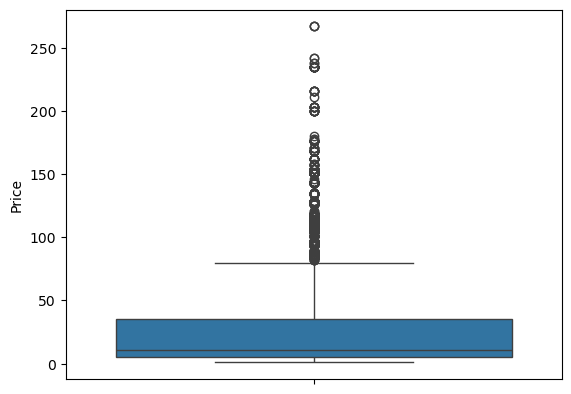

In [66]:
sns.boxplot(df.Price)

In [67]:
df[df['Price']>250]

,Transaction ID,Purchase Datetime,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Routes,Distance (km),Journey Date,Journey Day,Day Type,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Status,Reason for Delay,Refund Request,Departure Lat,Departure Lon,Arrival Lat,Arrival Lon
711,092e5598-08de-42f5-b6b2,2024-01-04 06:35:01+00:00,Station,Credit Card,Not Used,First Class,Anytime,267,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-04,Thursday,Weekday,2024-01-04 08:00:00+00:00,2024-01-04 09:50:00+00:00,2024-01-04 10:23:00+00:00,0 days 02:23:00,0 days 00:33:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
2042,05193f47-2107-4bb8-8adb,2024-01-09 06:33:37+00:00,Station,Credit Card,Not Used,First Class,Anytime,267,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-09,Tuesday,Weekday,2024-01-09 08:00:00+00:00,2024-01-09 09:50:00+00:00,2024-01-09 10:29:00+00:00,0 days 02:29:00,0 days 00:39:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
11849,de723682-3979-4d69-9664,2024-02-09 06:30:59+00:00,Station,Credit Card,Not Used,First Class,Anytime,267,Manchester Piccadilly,London Euston,Route 17,259.0,2024-02-09,Friday,Weekday,2024-02-09 08:00:00+00:00,2024-02-09 09:50:00+00:00,2024-02-09 10:16:00+00:00,0 days 02:16:00,0 days 00:26:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558


In [68]:
df[df['Routes']=='Route 17']

,Transaction ID,Purchase Datetime,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Routes,Distance (km),Journey Date,Journey Day,Day Type,Departure Datetime,Arrival Datetime,Actual Arrival Datetime,Journey Duration,Delay Duration,Journey Status,Reason for Delay,Refund Request,Departure Lat,Departure Lon,Arrival Lat,Arrival Lon
45,767314a0-f839-4607-a3d3,2024-01-01 05:09:30+00:00,Station,Credit Card,Not Used,First Class,Advance,134,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-02,Tuesday,Weekday,2024-01-02 03:30:00+00:00,2024-01-02 05:20:00+00:00,2024-01-02 05:31:00+00:00,0 days 02:01:00,0 days 00:11:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
61,711c08ba-eb61-44ba-821a,2024-01-01 09:30:09+00:00,Station,Credit Card,Not Used,First Class,Advance,134,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-02,Tuesday,Weekday,2024-01-02 08:00:00+00:00,2024-01-02 09:50:00+00:00,2024-01-02 10:08:00+00:00,0 days 02:08:00,0 days 00:18:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
88,86b1f064-06a4-4152-9b81,2024-01-02 00:26:21+00:00,Station,Credit Card,Adult,Standard,Off-Peak,84,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-02,Tuesday,Weekday,2024-01-02 01:45:00+00:00,2024-01-02 03:35:00+00:00,2024-01-02 03:35:00+00:00,0 days 01:50:00,0 days 00:00:00,On Time,There is no delay,No,53.47672,-2.228978,51.528376,-0.134558
101,c57dd321-4e2f-46c0-8cfb,2024-01-02 02:13:53+00:00,Station,Credit Card,Not Used,First Class,Off-Peak,200,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-02,Tuesday,Weekday,2024-01-02 03:30:00+00:00,2024-01-02 05:20:00+00:00,2024-01-02 05:31:00+00:00,0 days 02:01:00,0 days 00:11:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
130,a6ab593b-474f-41a5-bab9,2024-01-02 05:07:05+00:00,Station,Credit Card,Not Used,Standard,Advance,84,Manchester Piccadilly,London Euston,Route 17,259.0,2024-01-03,Wednesday,Weekday,2024-01-03 03:30:00+00:00,2024-01-03 05:20:00+00:00,2024-01-03 05:38:00+00:00,0 days 02:08:00,0 days 00:18:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30645,421bd0e1-bdcb-43ac-9b1f,2024-04-26 19:03:35+01:00,Station,Debit Card,Adult,Standard,Advance,56,Manchester Piccadilly,London Euston,Route 17,259.0,2024-04-27,Saturday,Weekend,2024-04-27 18:30:00+01:00,2024-04-27 20:20:00+01:00,2024-04-27 20:26:00+01:00,0 days 01:56:00,0 days 00:06:00,Delayed,Technical Issue,Yes,53.47672,-2.228978,51.528376,-0.134558
30866,67488422-ff65-46f9-b35b,2024-04-27 16:13:00+01:00,Station,Debit Card,Not Used,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,Route 17,259.0,2024-04-27,Saturday,Weekend,2024-04-27 16:30:00+01:00,2024-04-27 18:20:00+01:00,2024-04-27 18:20:00+01:00,0 days 01:50:00,0 days 00:00:00,Delayed,Staff Shortage,Yes,53.47672,-2.228978,51.528376,-0.134558
30992,b32dd7a7-e504-4ea1-8ba9,2024-04-28 03:03:20+01:00,Station,Credit Card,Not Used,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,Route 17,259.0,2024-04-28,Sunday,Weekend,2024-04-28 04:30:00+01:00,2024-04-28 06:20:00+01:00,2024-04-28 06:30:00+01:00,0 days 02:00:00,0 days 00:10:00,Delayed,Weather Conditions,No,53.47672,-2.228978,51.528376,-0.134558
31404,fff63592-7176-4266-87d3,2024-04-29 16:00:34+01:00,Station,Debit Card,Not Used,First Class,Off-Peak,200,Manchester Piccadilly,London Euston,Route 17,259.0,2024-04-29,Monday,Weekday,2024-04-29 16:30:00+01:00,2024-04-29 18:20:00+01:00,2024-04-29 18:33:00+01:00,0 days 02:03:00,0 days 00:13:00,Delayed,Staff Shortage,Yes,53.47672,-2.228978,51.528376,-0.134558


In [69]:
#df.to_csv('test_01_1.csv',index=False)

<span style='color:red ; font-size:40px ; font-weght:Bold ; font-family:"Arial "  '>
    2. Forecasting
</span> 

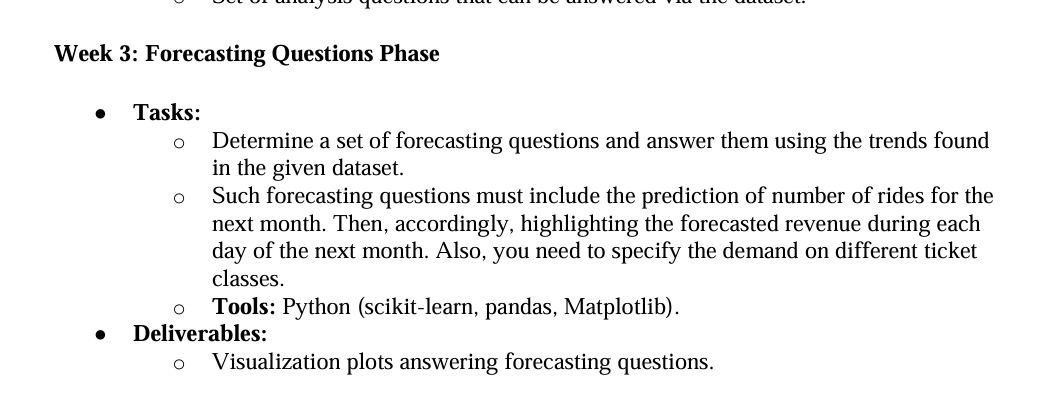

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Preparing Data for forecasting
</span>

In [71]:
Historical_Rides = df.groupby('Journey Date').size().reset_index(name='Historical_Rides')
Historical_Rides

,Journey Date,Historical_Rides
0,2024-01-01,66
1,2024-01-02,146
2,2024-01-03,292
3,2024-01-04,274
4,2024-01-05,253
...,...,...
116,2024-04-26,270
117,2024-04-27,269
118,2024-04-28,292
119,2024-04-29,249


In [72]:
Historical_Rides.set_index('Journey Date', inplace=True)
Historical_Rides

,Historical_Rides
Journey Date,
2024-01-01,66
2024-01-02,146
2024-01-03,292
2024-01-04,274
2024-01-05,253
...,...
2024-04-26,270
2024-04-27,269
2024-04-28,292


In [74]:
Historical_Revenue = df.groupby('Journey Date')['Price'].sum().reset_index(name='Historical_Revenue')
Historical_Revenue.set_index('Journey Date', inplace=True)
Historical_Revenue

,Historical_Revenue
Journey Date,
2024-01-01,1682
2024-01-02,4830
2024-01-03,7159
2024-01-04,7063
2024-01-05,5934
...,...
2024-04-26,6125
2024-04-27,6707
2024-04-28,6655


In [92]:
ticket_class_historical = df.groupby(['Journey Date', 'Ticket Class']).size().unstack(fill_value=0).reset_index()
ticket_class_historical.columns = ['Journey Date', 'FirstClass_Rides','Standard_Rides']
ticket_class_historical.set_index('Journey Date', inplace=True)

ticket_class_historical

,FirstClass_Rides,Standard_Rides
Journey Date,,
2024-01-01,4,62
2024-01-02,19,127
2024-01-03,31,261
2024-01-04,25,249
2024-01-05,22,231
...,...,...
2024-04-26,31,239
2024-04-27,25,244
2024-04-28,36,256


In [93]:
Historical_Summary = Historical_Revenue.merge(Historical_Rides,on='Journey Date').merge(ticket_class_historical,on='Journey Date')
Historical_Summary

,Historical_Revenue,Historical_Rides,FirstClass_Rides,Standard_Rides
Journey Date,,,,
2024-01-01,1682,66,4,62
2024-01-02,4830,146,19,127
2024-01-03,7159,292,31,261
2024-01-04,7063,274,25,249
2024-01-05,5934,253,22,231
...,...,...,...,...
2024-04-26,6125,270,31,239
2024-04-27,6707,269,25,244
2024-04-28,6655,292,36,256


In [94]:
Historical_Summary.describe()

,Historical_Revenue,Historical_Rides,FirstClass_Rides,Standard_Rides
count,121.000000,121.000000,121.000000,121.000000
mean,6131.578512,261.595041,25.272727,236.322314
std,1132.239541,40.011994,6.255664,36.211466
min,1562.000000,63.000000,4.000000,55.000000
25%,5546.000000,253.000000,21.000000,229.000000
50%,6227.000000,269.000000,25.000000,241.000000
75%,7003.000000,282.000000,30.000000,255.000000
max,9196.000000,313.000000,40.000000,281.000000


In [95]:
Historical_Summary.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2024-01-01 to 2024-04-30
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Historical_Revenue  121 non-null    int64
 1   Historical_Rides    121 non-null    int64
 2   FirstClass_Rides    121 non-null    int64
 3   Standard_Rides      121 non-null    int64
dtypes: int64(4)
memory usage: 4.7 KB


<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Analyze Trends
</span>

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

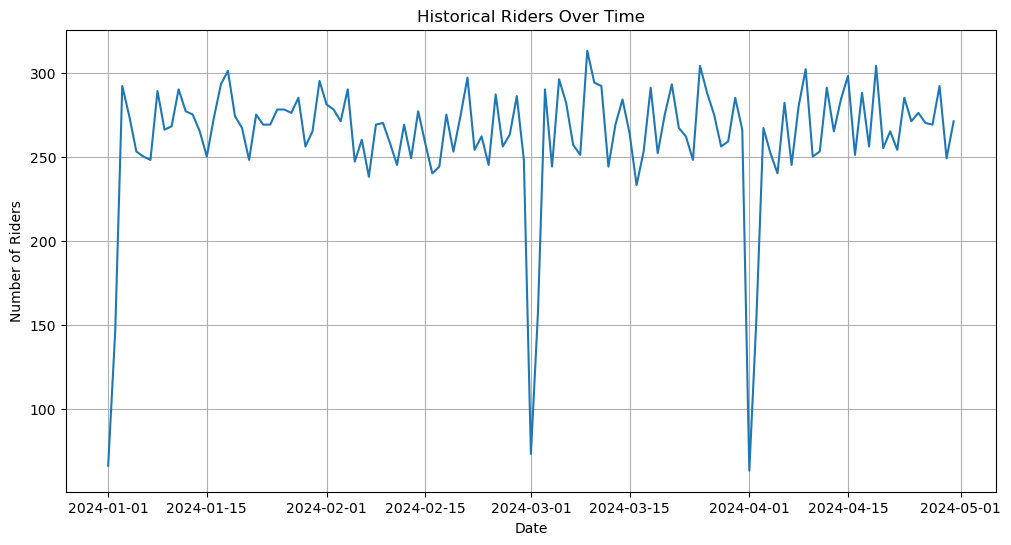

In [147]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Historical_Summary, x=Historical_Summary.index, y='Historical_Rides')
plt.title('Historical Riders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.grid(True)

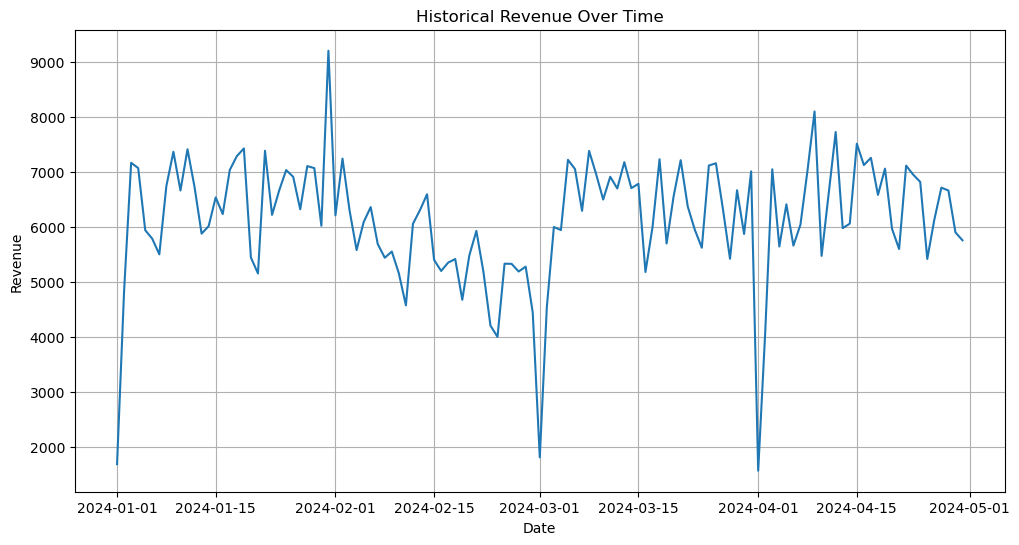

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Historical_Summary, x=Historical_Summary.index, y='Historical_Revenue')
plt.title('Historical Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)

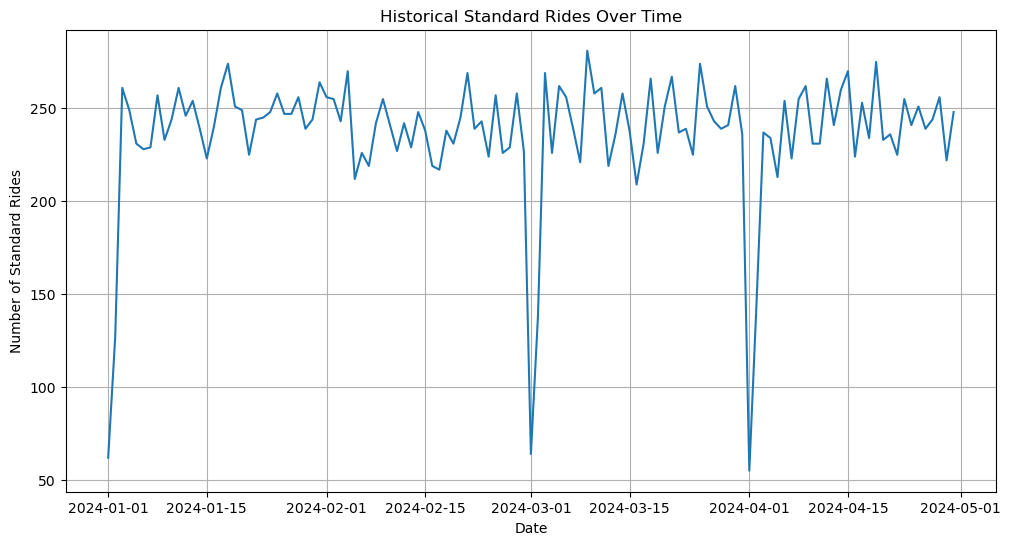

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Historical_Summary, x=Historical_Summary.index, y='Standard_Rides')
plt.title('Historical Standard Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Standard Rides')
plt.grid(True)

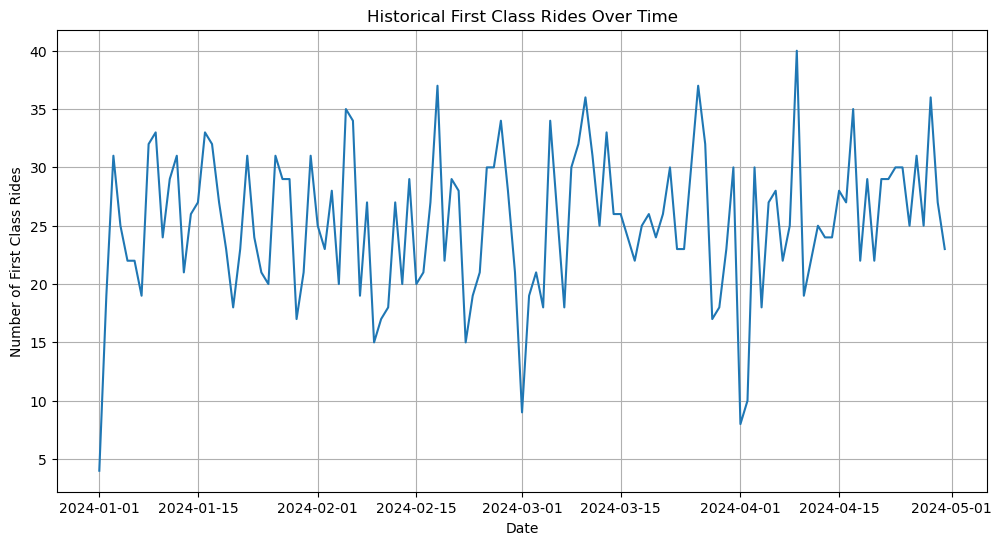

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Historical_Summary, x=Historical_Summary.index, y='FirstClass_Rides')
plt.title('Historical First Class Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of First Class Rides')
plt.grid(True)

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Time Series Decomposition
</span>

- Assuming daily data, a weekly seasonality (period=7) might be relevant.
    Or monthly if the pattern is stronger. Given 121 days, it's about 4 months.
- Let's try weekly seasonality first.

Text(0.5, 1.02, 'Decomposition of Historical Rides (Weekly Seasonality)')

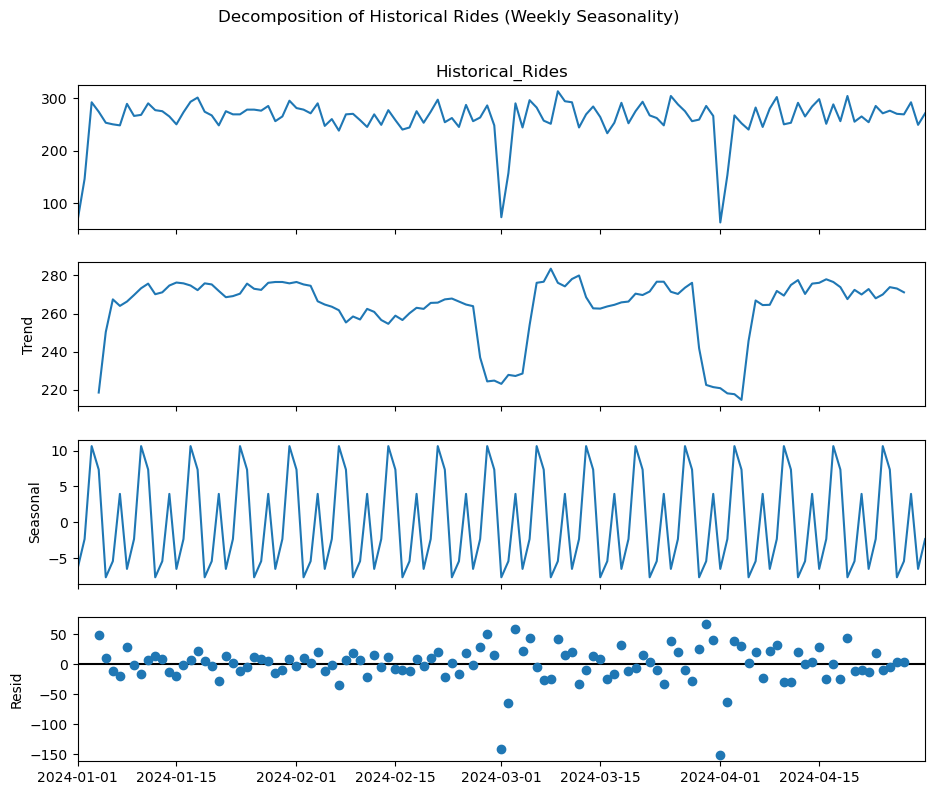

In [102]:
# Decomposition for Historical_Rides

period_to_test = 7

len(Historical_Summary['Historical_Rides']) >= 2 * period_to_test
decomposition_rides = seasonal_decompose(Historical_Summary['Historical_Rides'], model='additive', period=period_to_test)
fig_rides = decomposition_rides.plot()
fig_rides.set_size_inches(10, 8)
plt.suptitle('Decomposition of Historical Rides (Weekly Seasonality)', y=1.02)

Text(0.5, 1.02, 'Decomposition of Historical Revenue (Weekly Seasonality)')

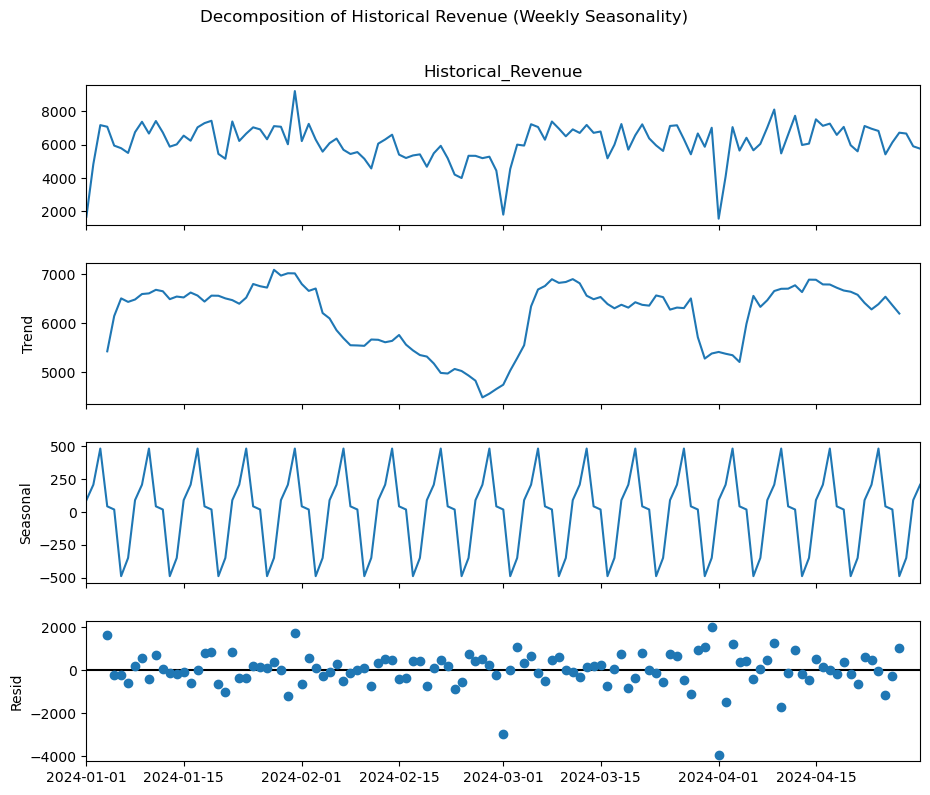

In [103]:
# Decomposition for Historical_Revenue

len(Historical_Summary['Historical_Revenue']) >= 2 * period_to_test
decomposition_revenue = seasonal_decompose(Historical_Summary['Historical_Revenue'], model='additive', period=period_to_test)
fig_revenue = decomposition_revenue.plot()
fig_revenue.set_size_inches(10, 8)
plt.suptitle('Decomposition of Historical Revenue (Weekly Seasonality)', y=1.02)

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Stationarity Test (ADF Test)
</span>

- Performing Augmented Dickey-Fuller (ADF) test for stationarity

In [104]:
def adf_test(series, series_name):
    print(f"\nResults of ADF Test for {series_name}:")
    # Handle potential NaN values by dropping them for the test
    series_cleaned = series.dropna()
    if series_cleaned.empty:
        print(f"Series {series_name} is empty after dropping NaNs. Cannot perform ADF test.")
        return
    
    result = adfuller(series_cleaned, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print(f"Conclusion: Reject the null hypothesis. {series_name} is likely stationary (p-value <= 0.05).")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. {series_name} is likely non-stationary (p-value > 0.05).")

adf_test(Historical_Summary['Historical_Rides'], 'Historical Rides')
adf_test(Historical_Summary['Historical_Revenue'], 'Historical Revenue')



Results of ADF Test for Historical Rides:
ADF Statistic: -8.912507793447507
p-value: 1.0946394967759386e-14
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057
Conclusion: Reject the null hypothesis. Historical Rides is likely stationary (p-value <= 0.05).

Results of ADF Test for Historical Revenue:
ADF Statistic: -4.404839033828011
p-value: 0.0002910337641095704
Critical Values:
	1%: -3.4870216863700767
	5%: -2.8863625166643136
	10%: -2.580009026141913
Conclusion: Reject the null hypothesis. Historical Revenue is likely stationary (p-value <= 0.05).


<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    ACF and PACF Plots
</span>

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF) - Historical Rides')

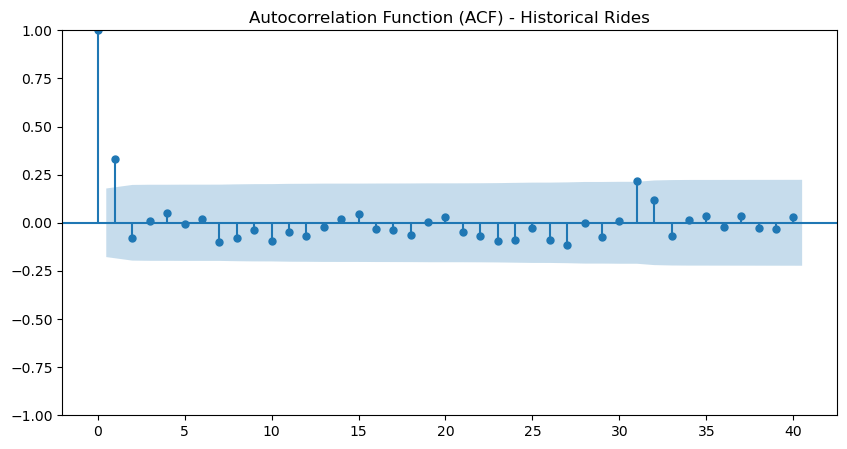

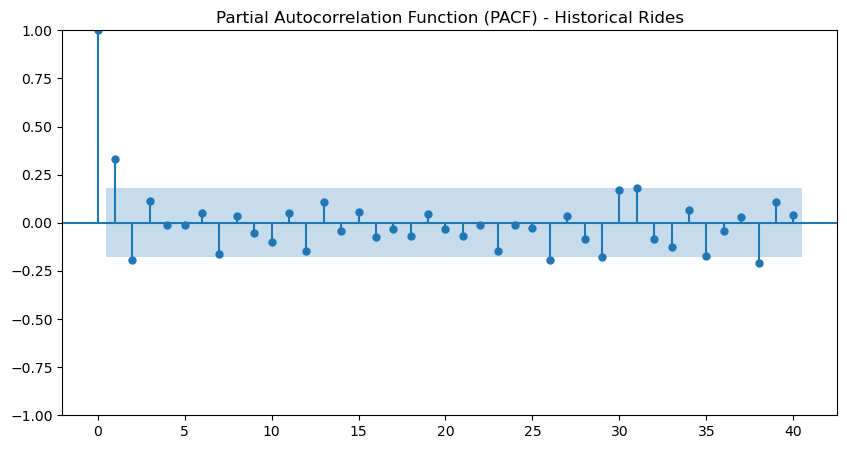

In [106]:
# ACF and PACF for Historical_Rides
fig_acf_rides, ax_acf_rides = plt.subplots(figsize=(10, 5))
plot_acf(Historical_Summary['Historical_Rides'].dropna(), ax=ax_acf_rides, lags=40) # Showing up to 40 lags
ax_acf_rides.set_title('Autocorrelation Function (ACF) - Historical Rides')


fig_pacf_rides, ax_pacf_rides = plt.subplots(figsize=(10, 5))
plot_pacf(Historical_Summary['Historical_Rides'].dropna(), ax=ax_pacf_rides, lags=40, method='ols') # method='ols' is often used
ax_pacf_rides.set_title('Partial Autocorrelation Function (PACF) - Historical Rides')

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF) - Historical Revenue')

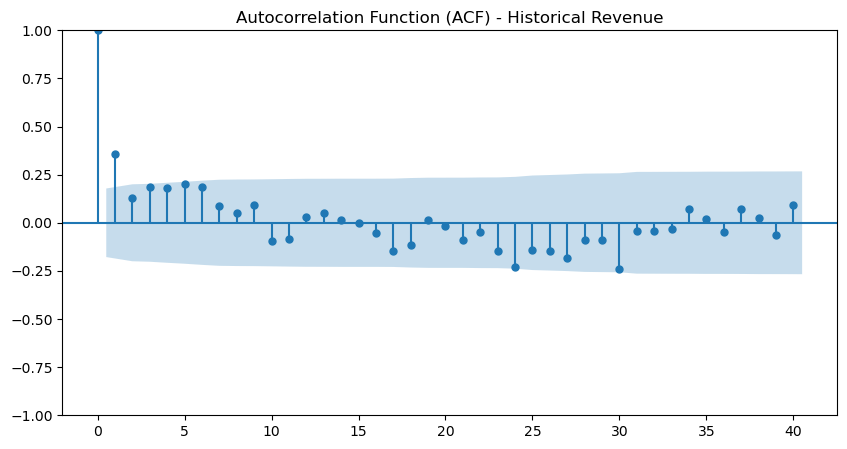

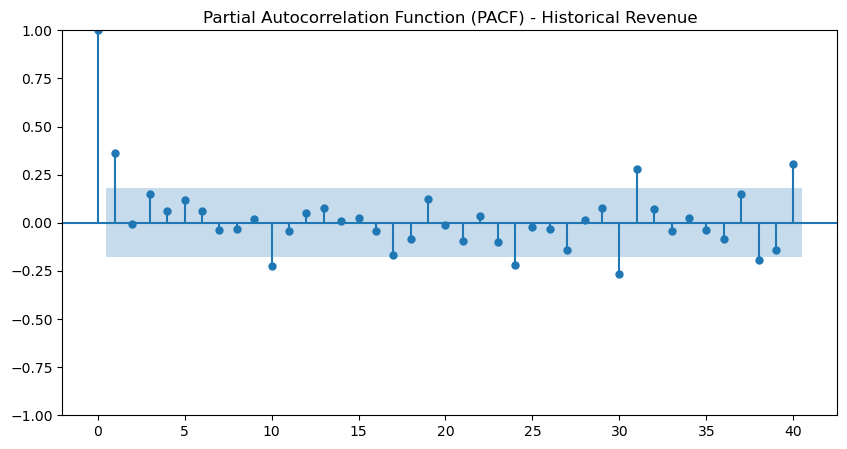

In [107]:
# ACF and PACF for Historical_Revenue

fig_acf_revenue, ax_acf_revenue = plt.subplots(figsize=(10, 5))
plot_acf(Historical_Summary['Historical_Revenue'].dropna(), ax=ax_acf_revenue, lags=40)
ax_acf_revenue.set_title('Autocorrelation Function (ACF) - Historical Revenue')



fig_pacf_revenue, ax_pacf_revenue = plt.subplots(figsize=(10, 5))
plot_pacf(Historical_Summary['Historical_Revenue'].dropna(), ax=ax_pacf_revenue, lags=40, method='ols')
ax_pacf_revenue.set_title('Partial Autocorrelation Function (PACF) - Historical Revenue')

<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Model Selection
</span>

In [109]:
# --- Define a function for model evaluation --- 
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n--- {model_name} Evaluation ---")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}%")
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}


In [110]:
# --- Function to plot forecasts vs actuals --- 
def plot_forecast(train, test, forecast, title, filename):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label="Training Data")
    plt.plot(test.index, test, label="Actual Test Data")
    plt.plot(test.index, forecast, label="Forecasted Data", linestyle="--")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)


In [111]:
# --- Target variables --- 
targets = {
    "Historical_Rides": {"seasonal_periods": 7, "trend": "add", "seasonal": "add"},
    "Historical_Revenue": {"seasonal_periods": 7, "trend": "add", "seasonal": "add"}
}

results_summary = {}



=============== Processing Target: Historical_Rides ===============
Training set size: 96, Test set size: 25

Training Exponential Smoothing (Holt-Winters) model...


C:\Users\Dell i5\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



--- Holt-Winters for Historical_Rides Evaluation ---
MAE: 55.6366
MSE: 3695.2972
RMSE: 60.7890
MAPE: 20.0623%

Training Auto ARIMA/SARIMA model...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=974.071, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=945.730, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=972.071, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=960.830, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=944.597, Time=0.60 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=957.334, Time=0.46 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=943.427, Time=0.70 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=944.547, Time=0.38 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf

C:\Users\Dell i5\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



--- Holt-Winters for Historical_Revenue Evaluation ---
MAE: 1153.1641
MSE: 1719739.1201
RMSE: 1311.3882
MAPE: 16.9714%

Training Auto ARIMA/SARIMA model...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=1517.833, Time=1.21 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1553.931, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1534.076, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1539.055, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1551.934, Time=0.04 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=1511.609, Time=0.94 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=1539.131, Time=0.15 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=1517.969, Time=1.39 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1525.634, Time=0.66 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=1516.715, Time=1.04 sec
 ARIMA(1,0,2)(0,1,

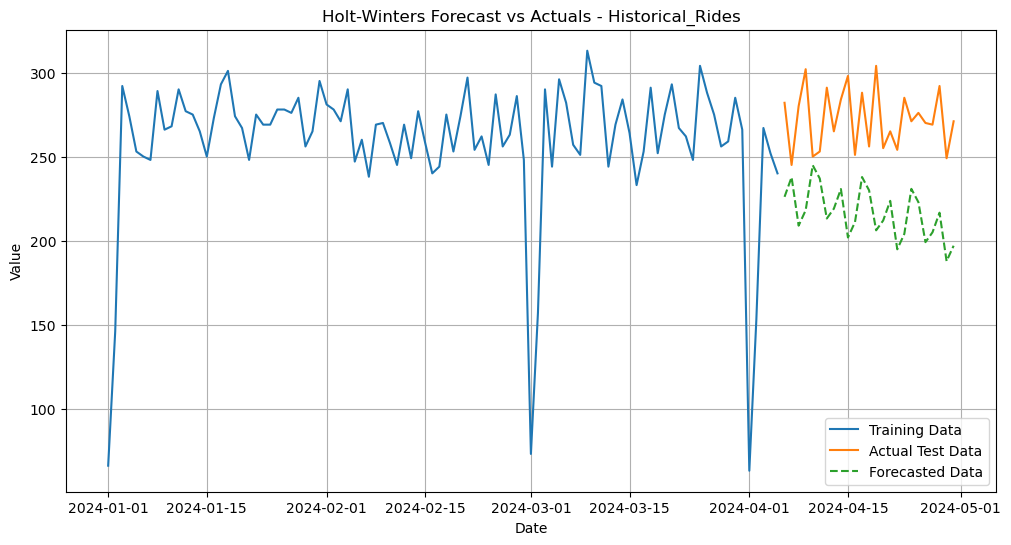

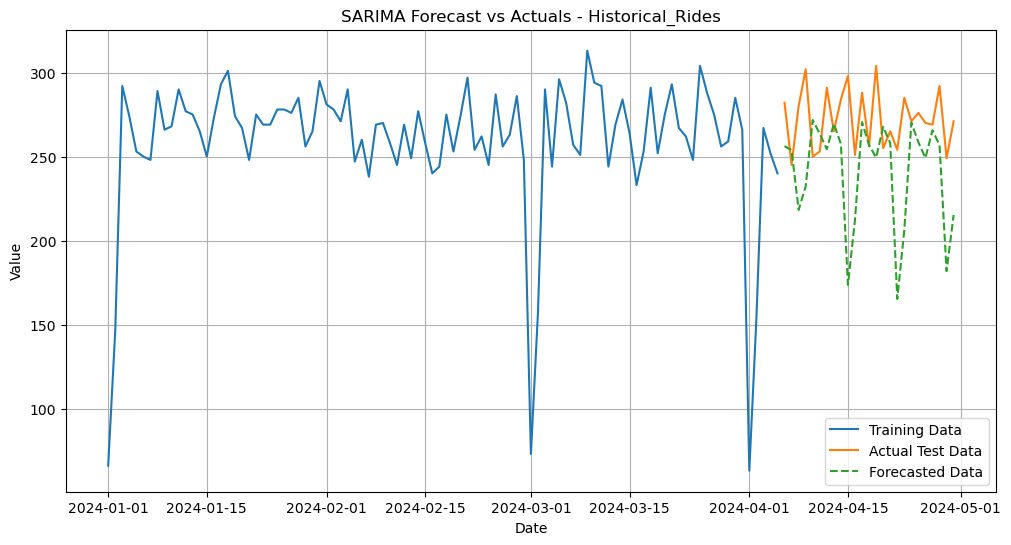

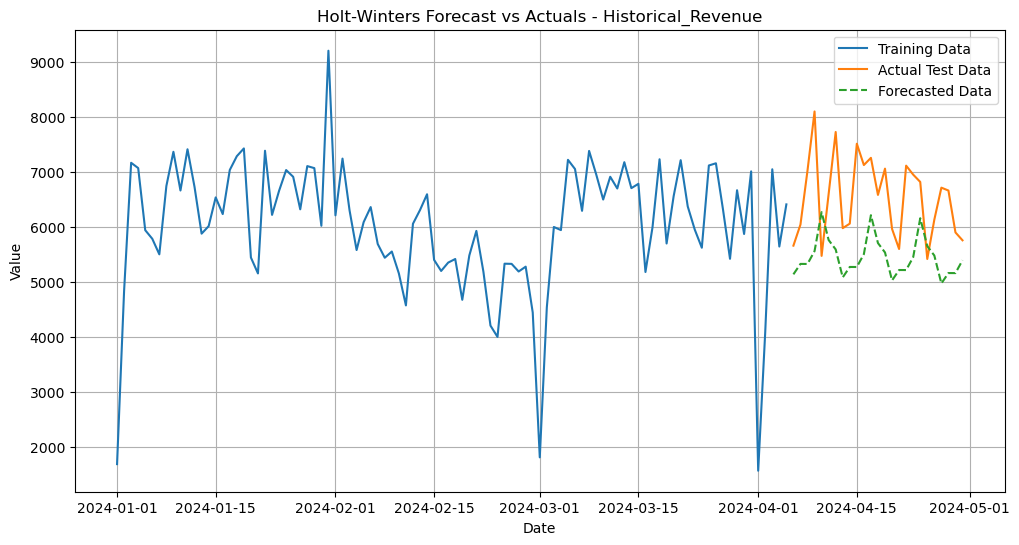

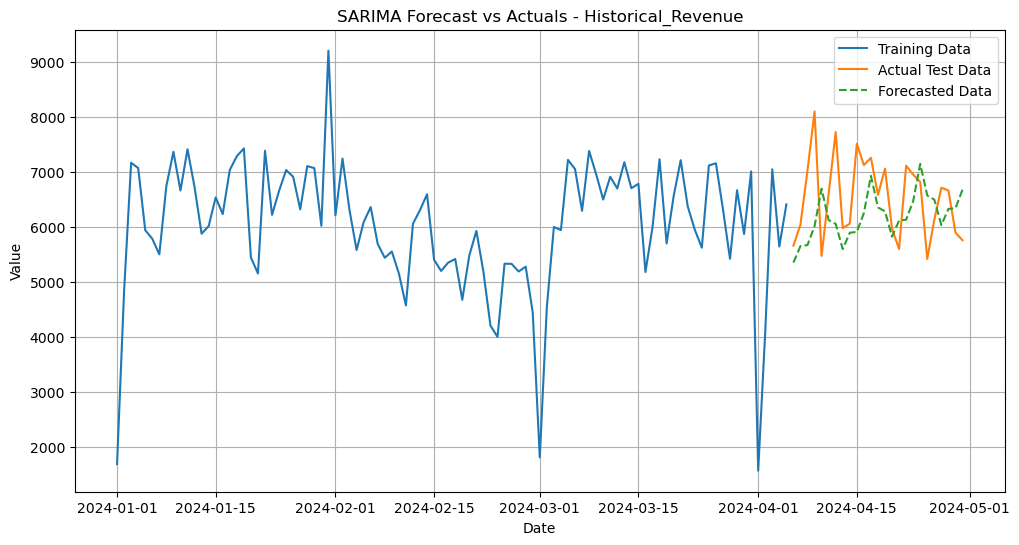

In [148]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

for target_col, params in targets.items():
    print(f"\n=============== Processing Target: {target_col} ===============")
    y = Historical_Summary[target_col]

    # Split data (80% train, 20% test)
    # Given 121 data points, 20% is approx 24 points.
    train_size = int(len(y) * 0.8)
    train, test = y[:train_size], y[train_size:]
    print(f"Training set size: {len(train)}, Test set size: {len(test)}")

    model_evaluations = {}

    # --- Model 1: Exponential Smoothing (Holt-Winters) --- 
    print("\nTraining Exponential Smoothing (Holt-Winters) model...")
    try:
        hw_model = ExponentialSmoothing(
            train,
            trend=params["trend"],
            seasonal=params["seasonal"],
            seasonal_periods=params["seasonal_periods"],
            initialization_method="estimated"
        ).fit()
        hw_forecast = hw_model.forecast(len(test))
        model_evaluations["Holt-Winters"] = evaluate_model(test, hw_forecast, f"Holt-Winters for {target_col}")
        plot_forecast(train, test, hw_forecast, f"Holt-Winters Forecast vs Actuals - {target_col}", f"{target_col.lower()}_hw_forecast.png")
    except Exception as e:
        print(f"Error training Holt-Winters for {target_col}: {e}")
        model_evaluations["Holt-Winters"] = {k: np.nan for k in ["MAE", "MSE", "RMSE", "MAPE"]}
            # --- Model 2: Auto ARIMA/SARIMA --- 
    print("\nTraining Auto ARIMA/SARIMA model...")
    # ADF test suggested stationarity (d=0). Seasonality period m=7 for weekly.
    # We will let auto_arima find the best p,q,P,Q. Start D=0 or 1 based on seasonal strength.
    # Given the decomposition showed some seasonality, let's try with m=7 and allow seasonal differencing if needed.
    try:
        sarima_model = pm.auto_arima(
            train,
            start_p=1, start_q=1,
            max_p=3, max_q=3,
            start_P=1, start_Q=1,
            max_P=2, max_Q=2,
            m=7, # Weekly seasonality
            seasonal=True,
            stepwise=True, # Faster
            suppress_warnings=True,
            D=1, # Let auto_arima decide D based on seasonal strength tests
            error_action="ignore",
            trace=True # Set to True for detailed output of model search
        )
        print(f"Best SARIMA model for {target_col}: {sarima_model.summary().tables[0].as_text()}\n{sarima_model.summary().tables[1].as_text()}")
        sarima_forecast = sarima_model.predict(n_periods=len(test))
        model_evaluations["SARIMA"] = evaluate_model(test, sarima_forecast, f"SARIMA for {target_col}")
        plot_forecast(train, test, sarima_forecast, f"SARIMA Forecast vs Actuals - {target_col}", f"{target_col.lower()}_sarima_forecast.png")
    except Exception as e:
        print(f"Error training SARIMA for {target_col}: {e}")
        model_evaluations["SARIMA"] = {k: np.nan for k in ["MAE", "MSE", "RMSE", "MAPE"]}

    results_summary[target_col] = model_evaluations

print("\n\n=============== Model Evaluation Summary ===============")
for target, models in results_summary.items():
    print(f"\n--- Target: {target} ---")
    best_model_name = None
    best_rmse = float("inf")
    for model_name, metrics in models.items():
        print(f"  Model: {model_name}")
        for metric_name, value in metrics.items():
            print(f"    {metric_name}: {value:.4f}")
            if metric_name == "RMSE" and value < best_rmse:
                best_rmse = value
                best_model_name = model_name
    print(f"  ==> Best model for {target} based on RMSE: {best_model_name} (RMSE: {best_rmse:.4f})")

print("\nModel selection and evaluation script finished.")




<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Forecast Next Month
</span>

In [119]:
# Determine the last date in the dataset and the forecast period
last_date = Historical_Summary.index[-1]
# Next month has 31 days (May 2024, as data ends April 30, 2024)
forecast_days = 31 
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')

print(f"Last date in dataset: {last_date}")
print(f"Forecasting for {forecast_days} days, starting from {forecast_index[0]} to {forecast_index[-1]}")

# Store final models and forecasts
final_models = {}
forecast_results_df = pd.DataFrame(index=forecast_index)

Last date in dataset: 2024-04-30 00:00:00
Forecasting for 31 days, starting from 2024-05-01 00:00:00 to 2024-05-31 00:00:00


In [120]:
# --- Target variables and their SARIMA parameters (from previous auto_arima or best model selection) ---
# These would ideally be the exact parameters from the best models found in model_selection.py
# For Historical_Rides, let's assume auto_arima found SARIMAX(0,0,0)x(1,0,0,7) with some intercept
# For Historical_Revenue, let's assume auto_arima found SARIMAX(1,0,0) with some intercept
# In a real scenario, these parameters should be loaded or passed from the previous step.
# For now, we will re-run auto_arima on the full dataset to get the best model for forecasting.


=============== Forecasting Target: Historical_Rides ===============
Training final SARIMA model for Historical_Rides on full dataset (121 points)...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1248.148, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1202.581, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1246.519, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1234.967, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1194.924, Time=0.25 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1208.827, Time=0.15 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=1194.238, Time=0.40 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=1201.986, Time=0.23 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept 

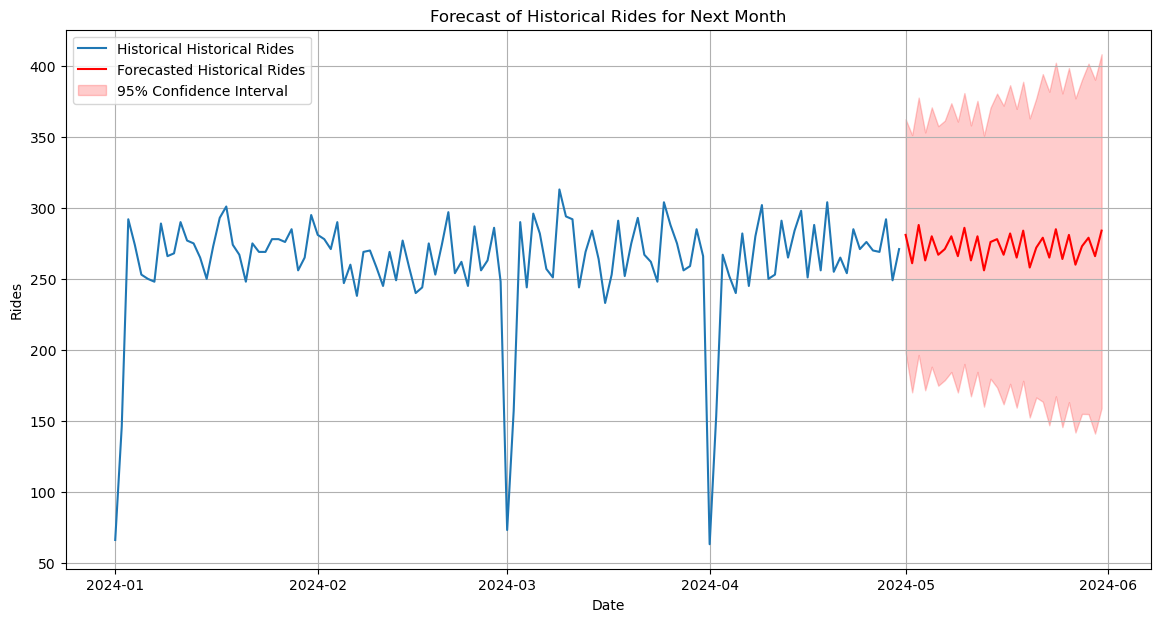


=============== Forecasting Target: Historical_Revenue ===============
Training final SARIMA model for Historical_Revenue on full dataset (121 points)...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=1925.240, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1994.091, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1963.859, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1992.206, Time=0.01 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1953.918, Time=0.20 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=1940.110, Time=0.66 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=1939.942, Time=0.79 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=1982.469, Time=0.06 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=1935.559, Time=0.59 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=1944.616, Time=0.52 sec
 ARIMA(1,0,1)(2,1,2)

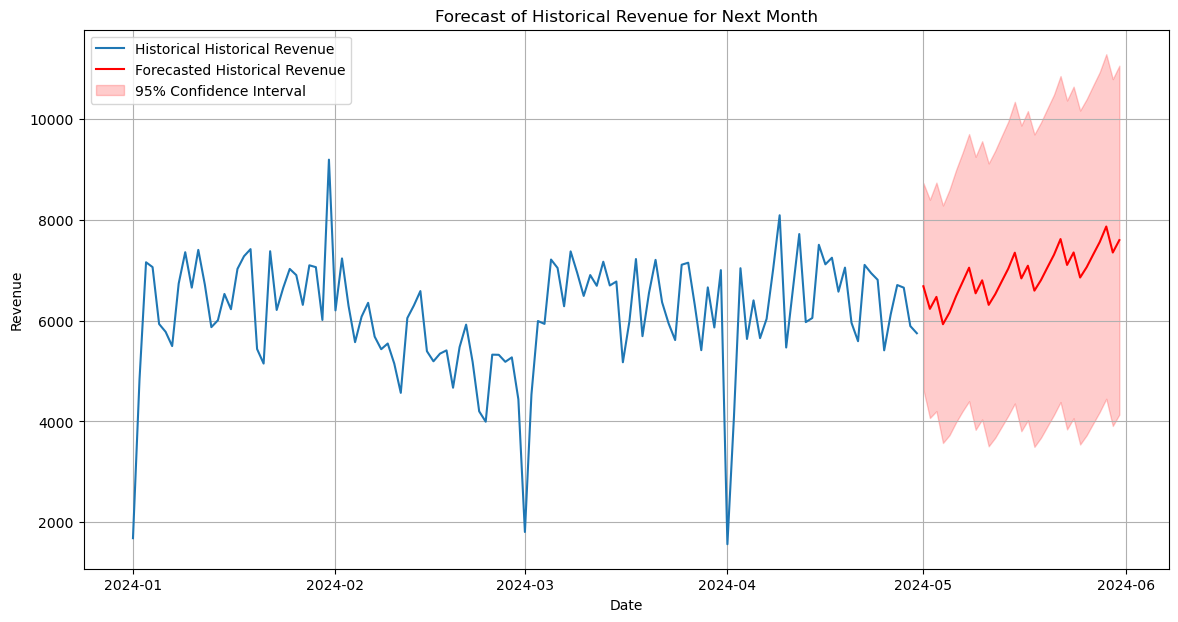

In [141]:

target_cols_params = {
    "Historical_Rides": {"seasonal_periods": 7},
    "Historical_Revenue": {"seasonal_periods": 7} # Assuming weekly seasonality might still be relevant for revenue too
}

for target_col, params in target_cols_params.items():
    print(f"\n=============== Forecasting Target: {target_col} ===============")
    y_full = Historical_Summary[target_col]

    print(f"Training final SARIMA model for {target_col} on full dataset ({len(y_full)} points)...")
    try:
        final_sarima_model = pm.auto_arima(
            y_full,
            start_p=1, start_q=1,
            max_p=3, max_q=3,
            start_P=1, start_Q=1,
            max_P=2, max_Q=2,
            m=7,
            seasonal=True,
            stepwise=True,
            suppress_warnings=True,
            D=1, # Let auto_arima decide D
            error_action="ignore",
            trace=True # Set to True for detailed output
        )
        print(f"Final SARIMA model for {target_col}: {final_sarima_model.summary().tables[0].as_text()}\n{final_sarima_model.summary().tables[1].as_text()}")
        
        # Forecast for the next month
        forecast_values, conf_int = final_sarima_model.predict(n_periods=forecast_days, return_conf_int=True)
        
        # Rides should be integers
        if target_col == "Historical_Rides":
            forecast_values = np.ceil(forecast_values).astype(int) # Round up to nearest integer
            forecast_values[forecast_values < 0] = 0 # Ensure rides are not negative

        forecast_results_df[f"Forecast_{target_col}"] = forecast_values
        forecast_results_df[f"Forecast_{target_col}_Lower_CI"] = conf_int[:, 0]
        forecast_results_df[f"Forecast_{target_col}_Upper_CI"] = conf_int[:, 1]

        final_models[target_col] = final_sarima_model

        # Plotting the forecast with historical data
        plt.figure(figsize=(14, 7))
        plt.plot(Historical_Summary.index, Historical_Summary[target_col], label=f"Historical {target_col.replace('_', ' ')}")
        plt.plot(forecast_index, forecast_values, label=f"Forecasted {target_col.replace('_', ' ')}", color='red')
        plt.fill_between(forecast_index, 
                         conf_int[:, 0], 
                         conf_int[:, 1], 
                         color='red', alpha=0.2, label="95% Confidence Interval")
        plt.title(f"Forecast of {target_col.replace('_', ' ')} for Next Month")
        plt.xlabel("Date")
        plt.ylabel(target_col.replace('Historical_', ''))
        plt.legend()
        plt.grid(True)
        plt.show()


    except Exception as e:
        print(f"Error forecasting {target_col}: {e}")
        forecast_results_df[f"Forecast_{target_col}"] = np.nan
        forecast_results_df[f"Forecast_{target_col}_Lower_CI"] = np.nan
        forecast_results_df[f"Forecast_{target_col}_Upper_CI"] = np.nan


In [143]:
# Save the forecast results to a CSV file

forecast_results_df.to_csv('next_month_forecasts.csv',index=False)


In [142]:
forecast_results_df.head()

,Forecast_Historical_Rides,Forecast_Historical_Rides_Lower_CI,Forecast_Historical_Rides_Upper_CI,Forecast_Historical_Revenue,Forecast_Historical_Revenue_Lower_CI,Forecast_Historical_Revenue_Upper_CI,Forecast_Standard_Rides,Forecast_Standard_Rides_Lower_CI,Forecast_Standard_Rides_Upper_CI,Forecast_FirstClass_Rides,Forecast_FirstClass_Rides_Lower_CI,Forecast_FirstClass_Rides_Upper_CI
2024-05-01,281,198.034978,362.539003,6682.739153,4633.041878,8732.436428,248,184,311,25,13,36
2024-05-02,261,170.003791,351.362509,6234.301486,4067.296520,8401.306452,236,165,308,26,14,38
2024-05-03,288,196.377340,377.750582,6471.884495,4203.242793,8740.526197,236,165,308,25,13,37
2024-05-04,263,171.472954,353.200191,5928.997375,3571.546759,8286.447991,236,165,308,26,14,38
2024-05-05,280,188.078914,370.867867,6161.931673,3726.378982,8597.484365,236,165,308,24,12,36


<span style='color:blue ; font-size:30px ; font-weght:bold ; font-family:"Arial "  '>
    Forecast Ticket Classes
</span>


=============== Forecasting Ticket Class: Standard_Rides ===============
Training final SARIMA model for Standard_Rides on full dataset (121 points)...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1222.396, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1179.097, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1220.733, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1208.503, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1171.110, Time=0.20 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1184.838, Time=0.11 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=1170.248, Time=0.31 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=1178.248, Time=0.14 sec
 ARIMA(2,0,0)(2,1,1)[7] intercep

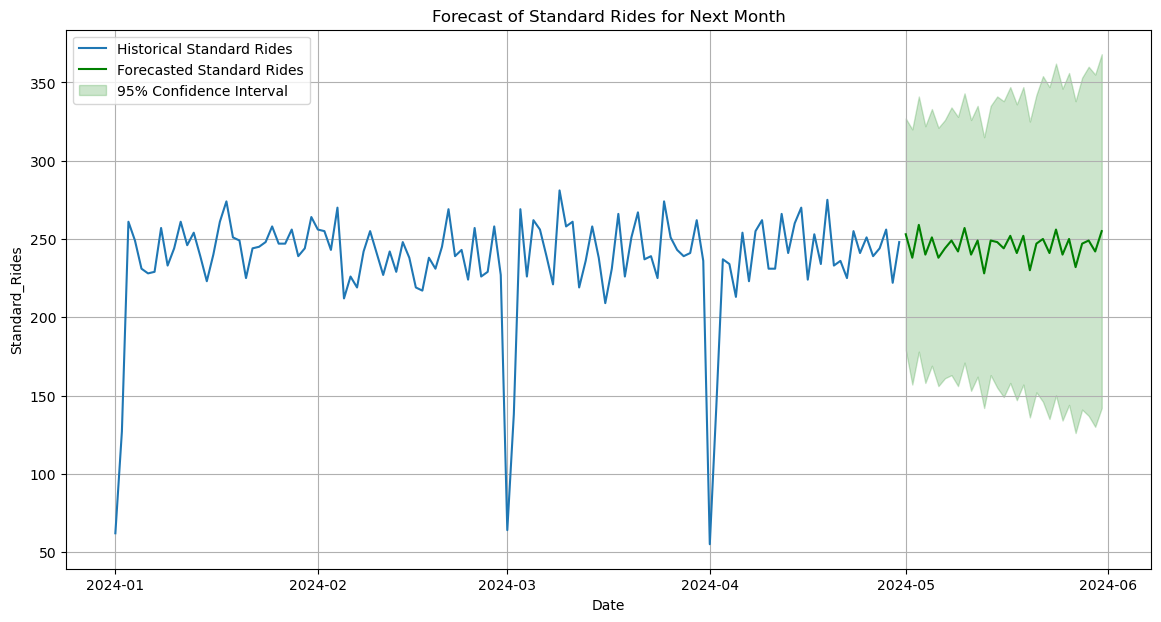

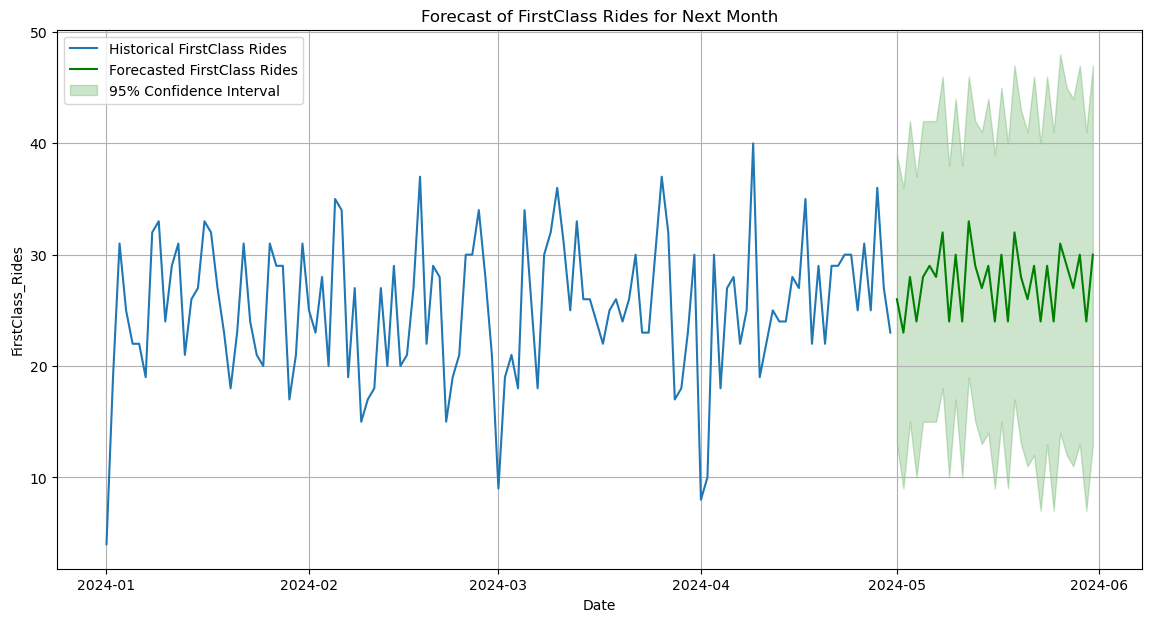

In [144]:
# --- Target ticket class variables ---
ticket_class_targets = {
    "Standard_Rides": {"seasonal_periods": 7},
    "FirstClass_Rides": {"seasonal_periods": 7}
}

final_ticket_models = {}

for target_col, params in ticket_class_targets.items():
    print(f"\n=============== Forecasting Ticket Class: {target_col} ===============")
    y_full = Historical_Summary[target_col]

    print(f"Training final SARIMA model for {target_col} on full dataset ({len(y_full)} points)...")
    try:
        final_sarima_model = pm.auto_arima(
            y_full,
            start_p=1, start_q=1,
            max_p=3, max_q=3,
            start_P=1, start_Q=1,
            max_P=2, max_Q=2,
            m=7,
            seasonal=True,
            stepwise=True,
            suppress_warnings=True,
            D=1, 
            error_action="ignore",
            trace=True
        )
        print(f"Final SARIMA model for {target_col}: {final_sarima_model.summary().tables[0].as_text()}\n{final_sarima_model.summary().tables[1].as_text()}")
        
        forecast_values, conf_int = final_sarima_model.predict(n_periods=forecast_days, return_conf_int=True)
        
        # Rides should be integers and non-negative
        forecast_values = np.ceil(forecast_values).astype(int)
        forecast_values[forecast_values < 0] = 0 

        forecast_results_df[f"Forecast_{target_col}"] = forecast_values
        forecast_results_df[f"Forecast_{target_col}_Lower_CI"] = np.maximum(0, np.ceil(conf_int[:, 0])).astype(int) # Ensure CI is also non-negative and integer
        forecast_results_df[f"Forecast_{target_col}_Upper_CI"] = np.ceil(conf_int[:, 1]).astype(int)

        final_ticket_models[target_col] = final_sarima_model

        # Plotting the forecast
        plt.figure(figsize=(14, 7))
        plt.plot(Historical_Summary.index, Historical_Summary[target_col], label=f"Historical {target_col.replace('_', ' ')}")
        plt.plot(forecast_index, forecast_values, label=f"Forecasted {target_col.replace('_', ' ')}", color='green')
        plt.fill_between(forecast_index, 
                         forecast_results_df[f"Forecast_{target_col}_Lower_CI"], 
                         forecast_results_df[f"Forecast_{target_col}_Upper_CI"], 
                         color='green', alpha=0.2, label="95% Confidence Interval")
        plt.title(f"Forecast of {target_col.replace('_', ' ')} for Next Month")
        plt.xlabel("Date")
        plt.ylabel(target_col.replace('Historical_', ''))
        plt.legend()
        plt.grid(True)

    except Exception as e:
        print(f"Error forecasting {target_col}: {e}")
        forecast_results_df[f"Forecast_{target_col}"] = np.nan
        forecast_results_df[f"Forecast_{target_col}_Lower_CI"] = np.nan
        forecast_results_df[f"Forecast_{target_col}_Upper_CI"] = np.nan

# Save/Update the forecast results CSV file
forecast_results_df.to_csv('ticket_next_month_forecasts.csv',index=False)

print(forecast_results_df.head())


print("\nForecasting script for ticket classes finished.")



In [145]:
forecast_results_df.head()

,Forecast_Historical_Rides,Forecast_Historical_Rides_Lower_CI,Forecast_Historical_Rides_Upper_CI,Forecast_Historical_Revenue,Forecast_Historical_Revenue_Lower_CI,Forecast_Historical_Revenue_Upper_CI,Forecast_Standard_Rides,Forecast_Standard_Rides_Lower_CI,Forecast_Standard_Rides_Upper_CI,Forecast_FirstClass_Rides,Forecast_FirstClass_Rides_Lower_CI,Forecast_FirstClass_Rides_Upper_CI
2024-05-01,281,198.034978,362.539003,6682.739153,4633.041878,8732.436428,253,179,327,26,13,39
2024-05-02,261,170.003791,351.362509,6234.301486,4067.296520,8401.306452,238,157,320,23,9,36
2024-05-03,288,196.377340,377.750582,6471.884495,4203.242793,8740.526197,259,178,341,28,15,42
2024-05-04,263,171.472954,353.200191,5928.997375,3571.546759,8286.447991,240,158,322,24,10,37
2024-05-05,280,188.078914,370.867867,6161.931673,3726.378982,8597.484365,251,169,333,28,15,42
